In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train, test =pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/train.csv"), pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
combine = [train, test]

In [5]:
drop_columns=['Alley','PoolQC','Fence','MiscFeature', 'MasVnrType', 'FireplaceQu']




In [6]:
for dataset in combine:
    dataset.drop(columns=drop_columns, axis=1, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
y_train = train['SalePrice']
train.drop(['SalePrice'], axis =1, inplace = True)

In [9]:
train_cols, test_cols = pd.DataFrame(train.columns), pd.DataFrame(test.columns)
print(train_cols.equals(test_cols))

True


In [10]:
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()
object_columns = train.select_dtypes(include='object').columns.tolist()

In [11]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_most_frequent = SimpleImputer(strategy='most_frequent')

for col in numeric_columns:
    imputed_mean_train = imp_mean.fit_transform(train[col].values.reshape(-1, 1))
    train[col] = pd.Series(imputed_mean_train.flatten())
    
    imputed_mean_test = imp_mean.fit_transform(test[col].values.reshape(-1, 1))
    test[col] = pd.Series(imputed_mean_test.flatten())

for col in object_columns:
    imputed_object_train = imp_most_frequent.fit_transform(train[col].values.reshape(-1, 1))
    train[col] = pd.Series(imputed_object_train.flatten())
    
    imputed_object_test = imp_most_frequent.fit_transform(test[col].values.reshape(-1, 1))
    test[col] = pd.Series(imputed_object_test.flatten())

In [12]:

y_train_df = y_train.to_frame(name='SalePrice')

# Concatenate y_train with train DataFrame
train = pd.concat([train, y_train_df], axis=1)

# Verify the concatenation
print("Columns in train:")
print(train.columns)

print("First few rows of train:")
print(train.head())


Columns in train:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorch

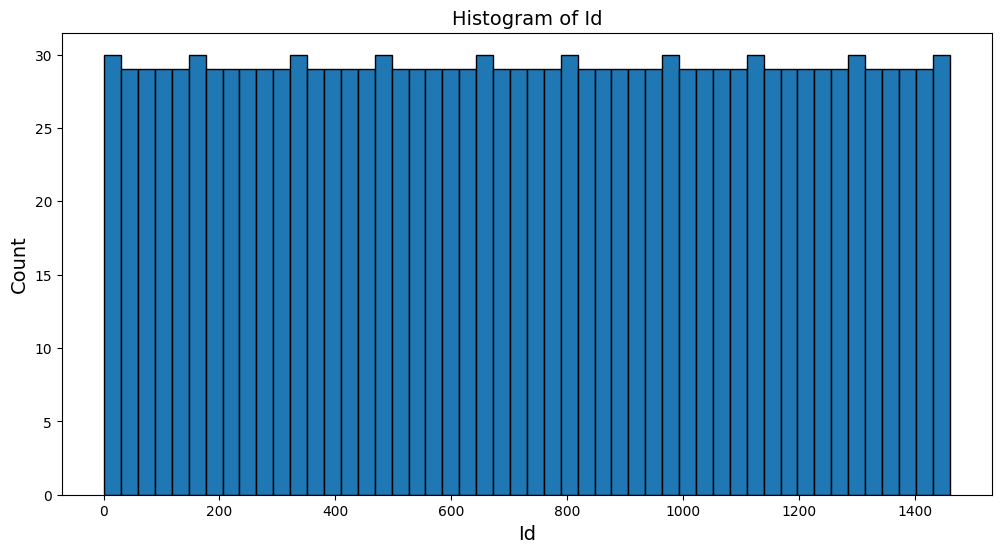

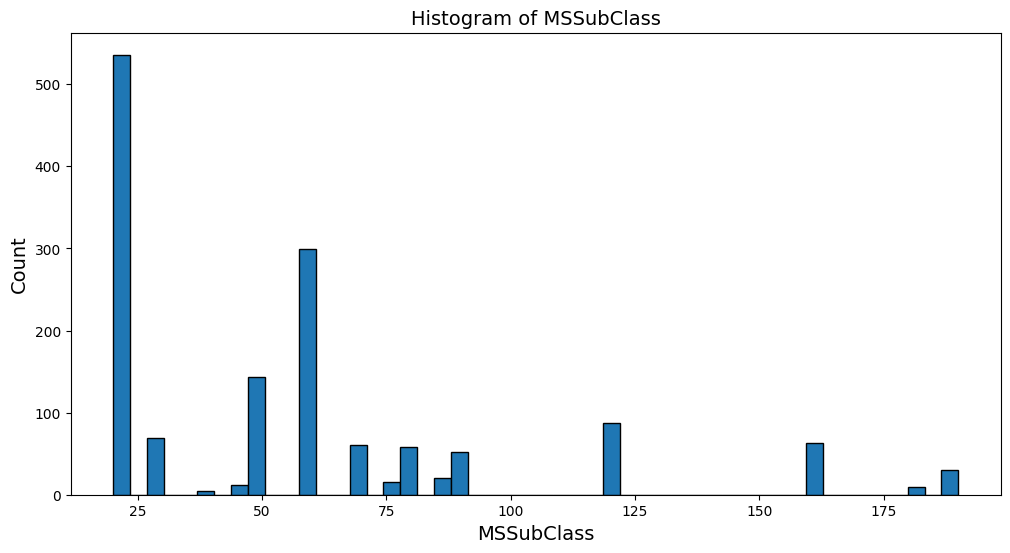

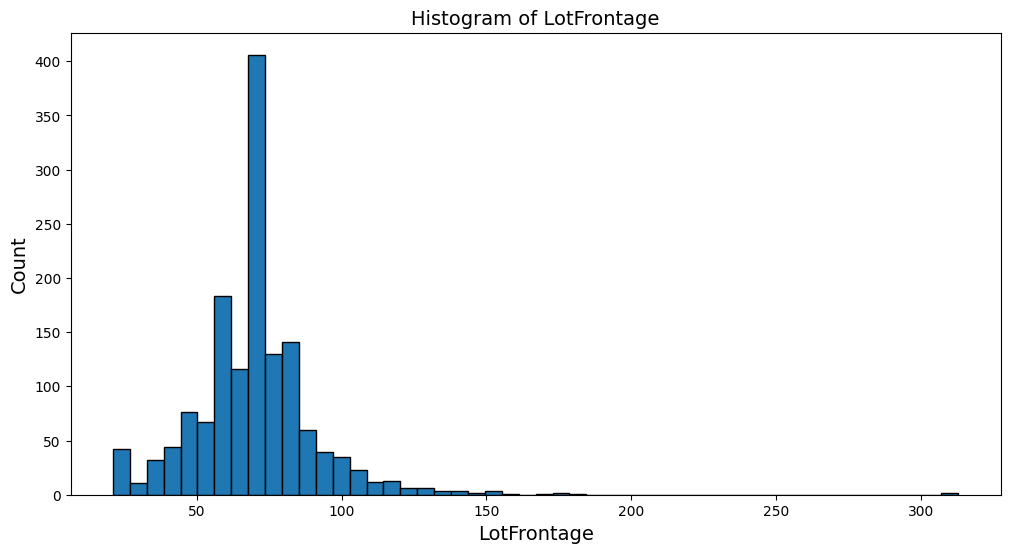

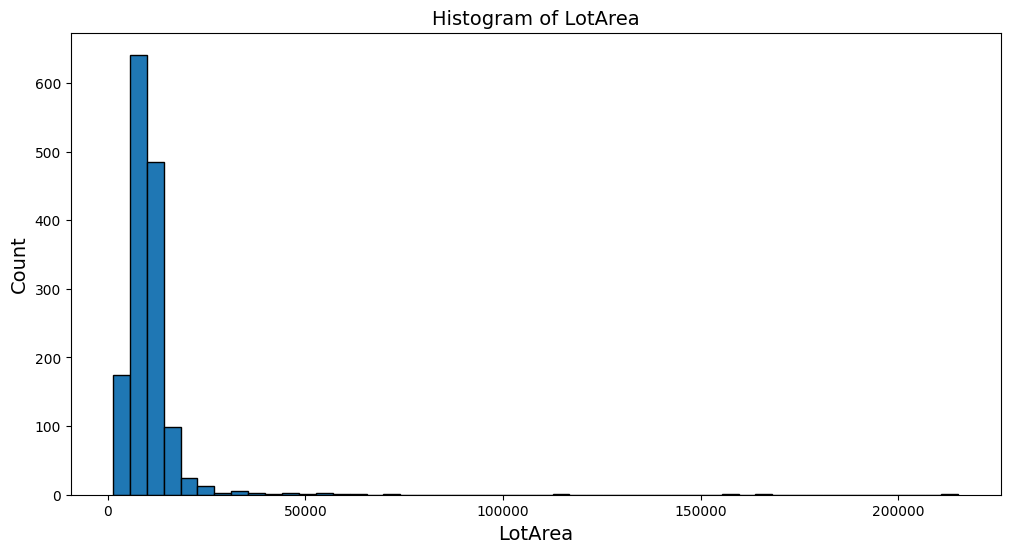

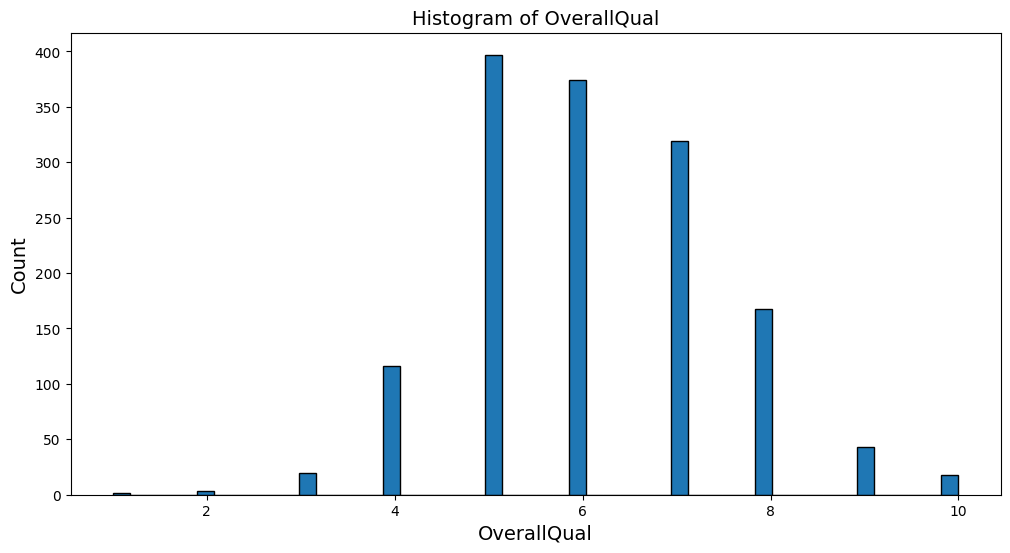

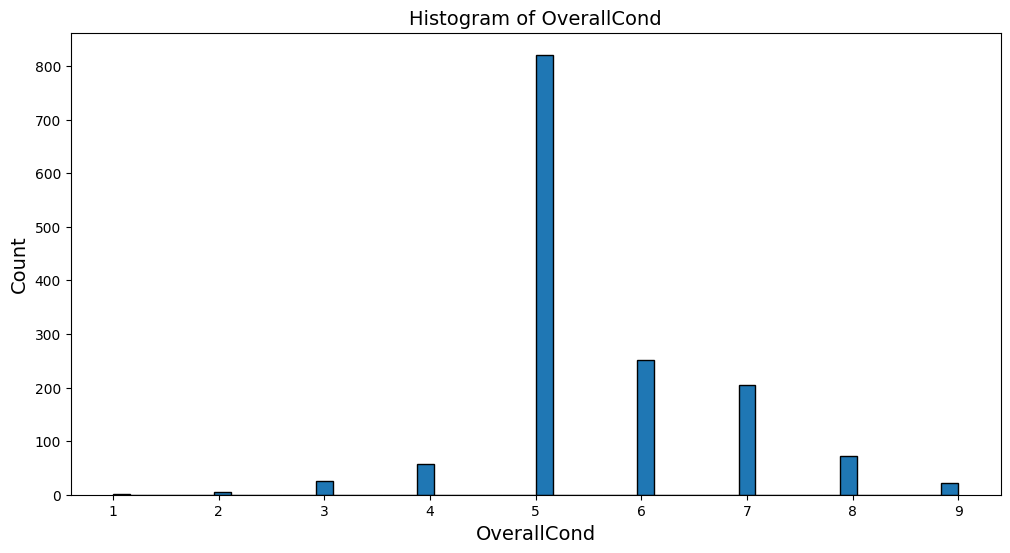

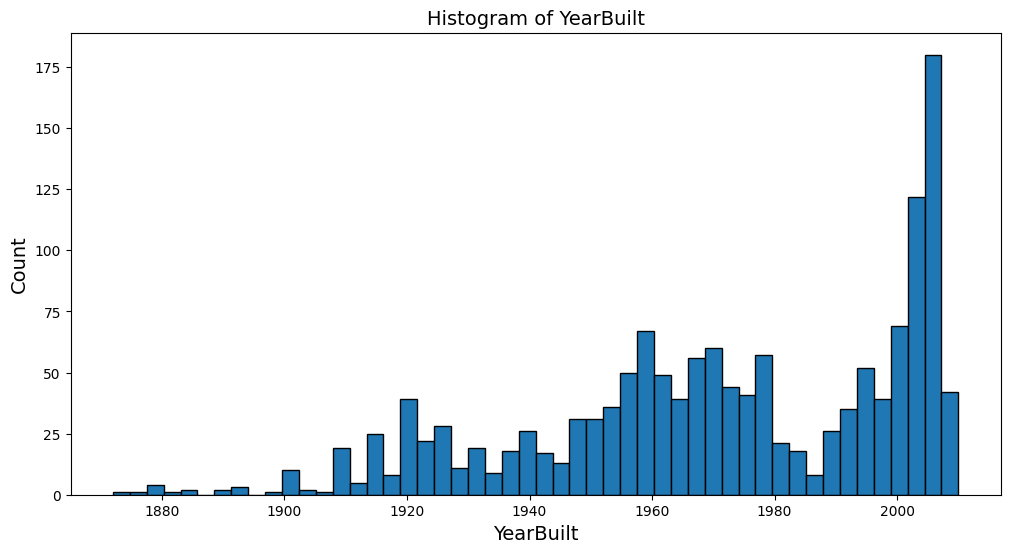

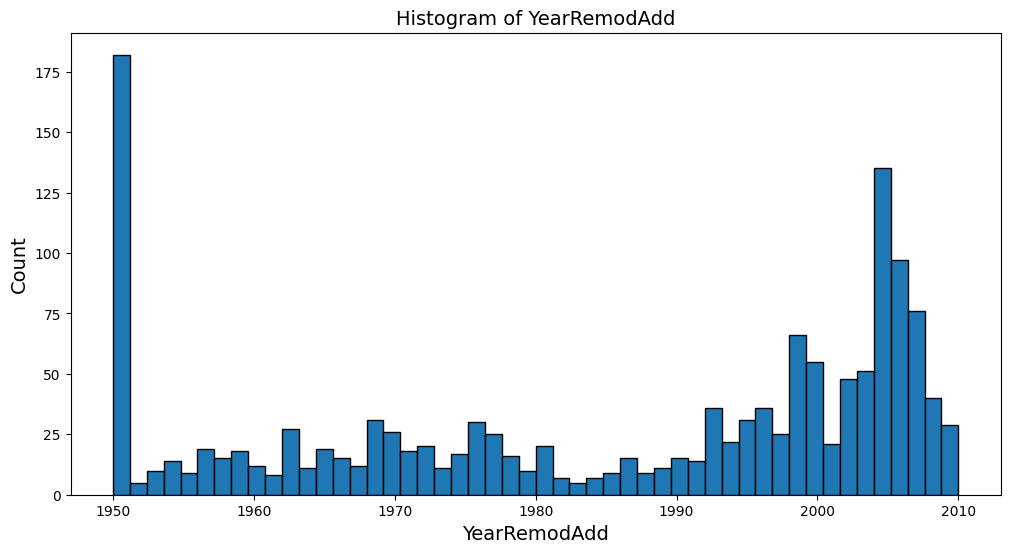

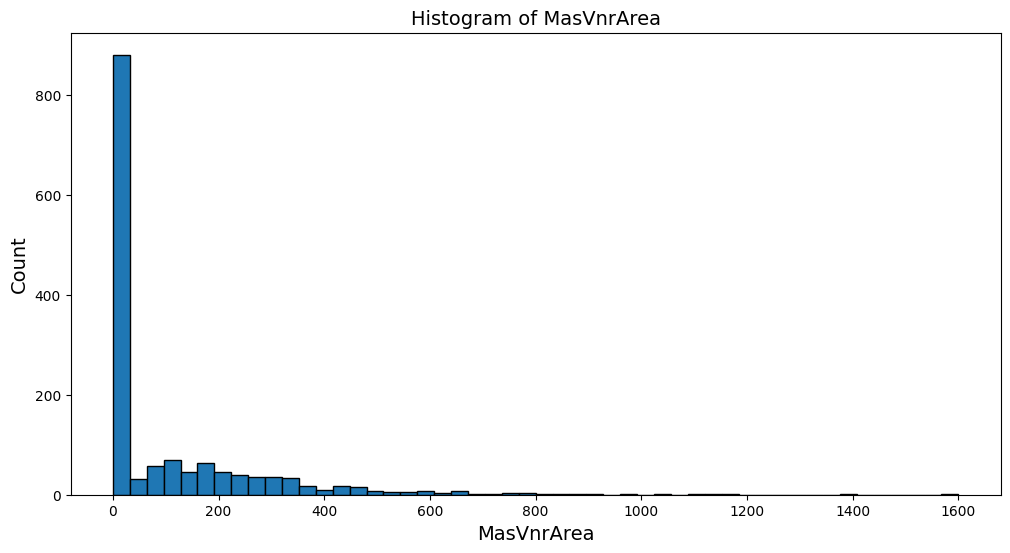

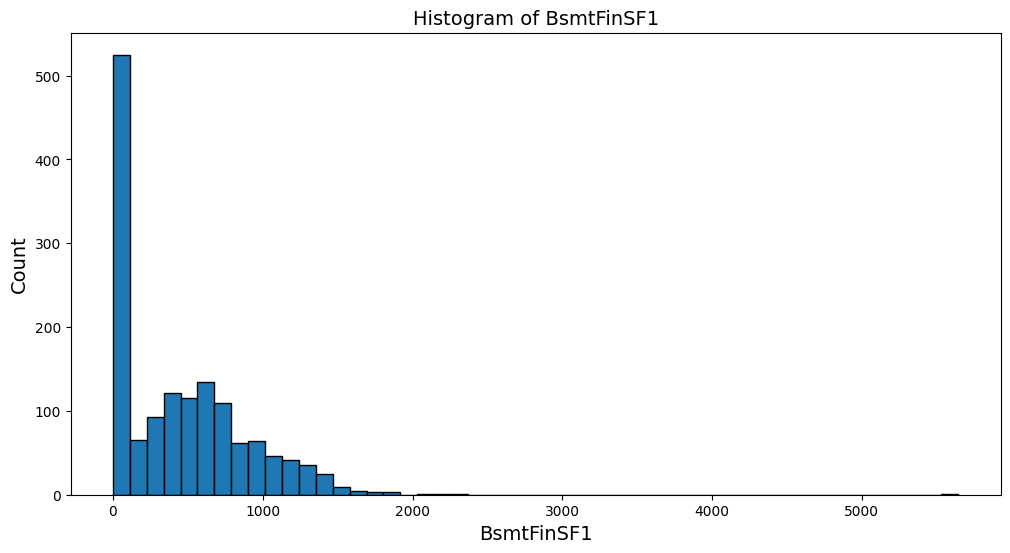

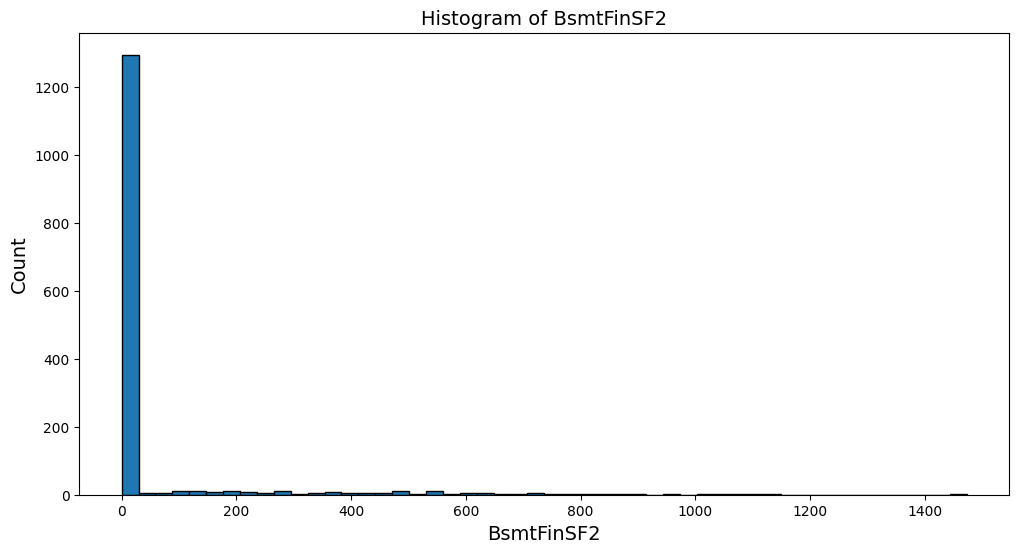

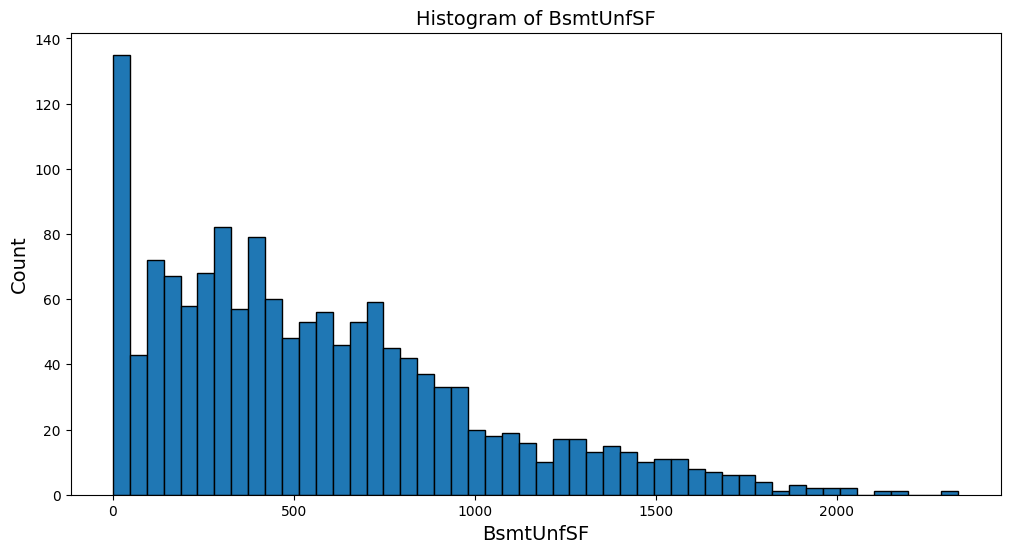

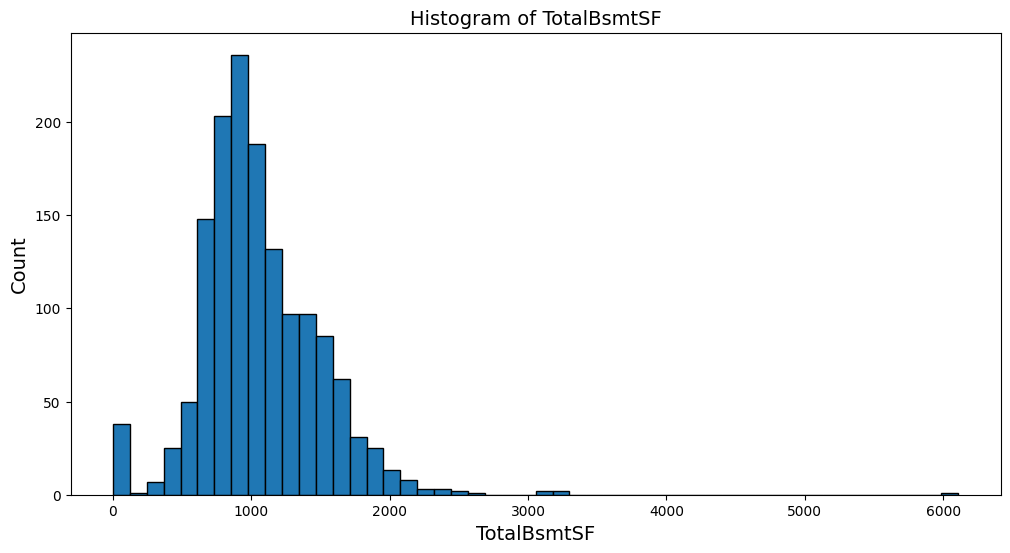

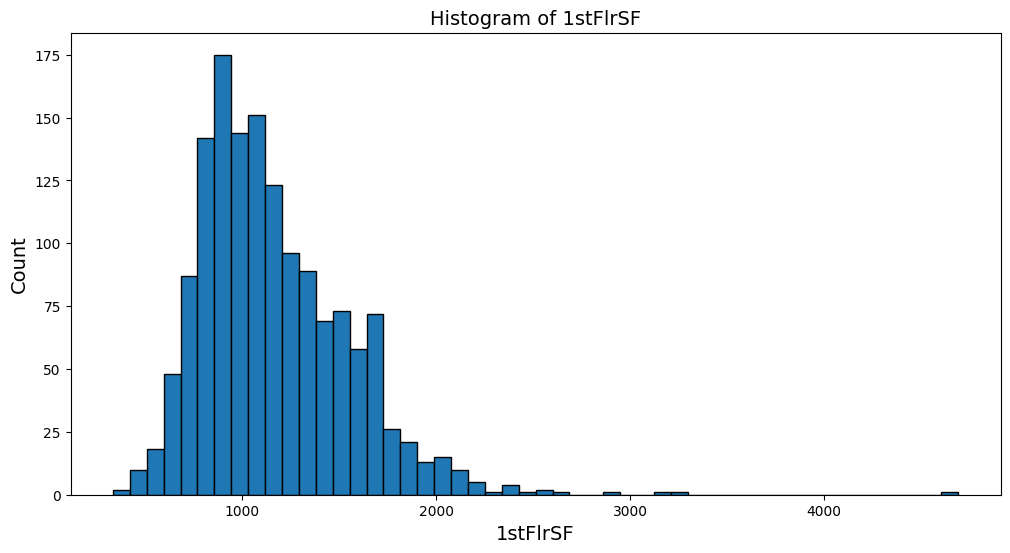

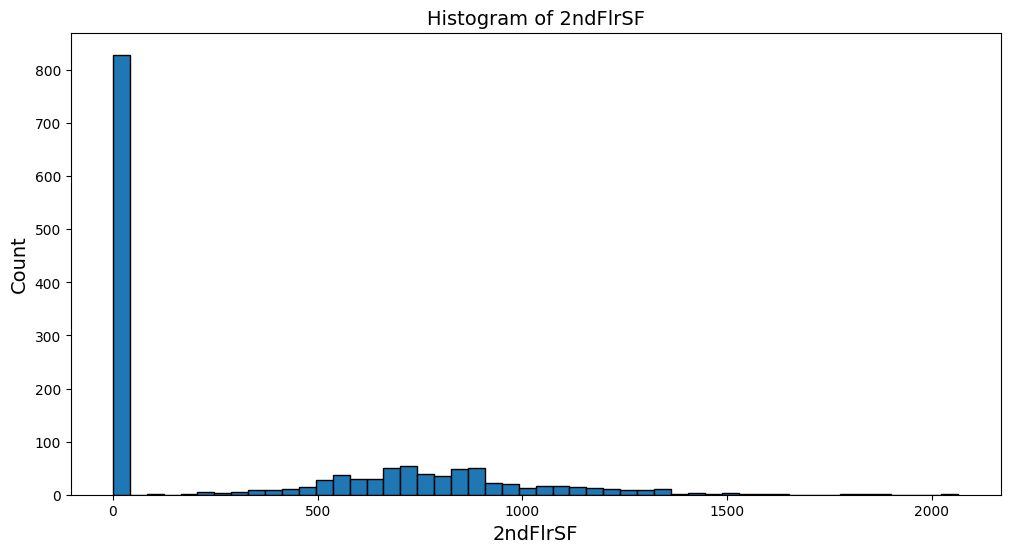

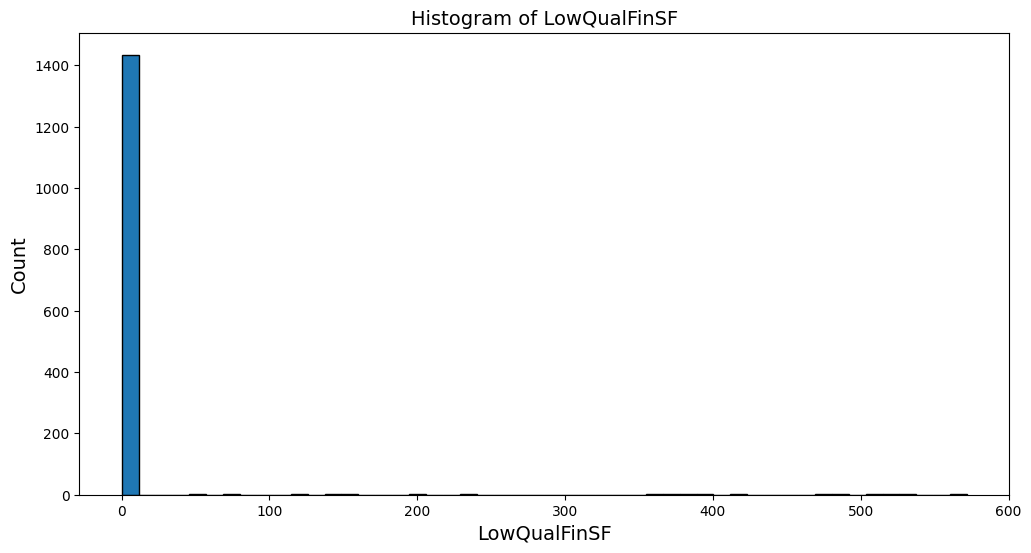

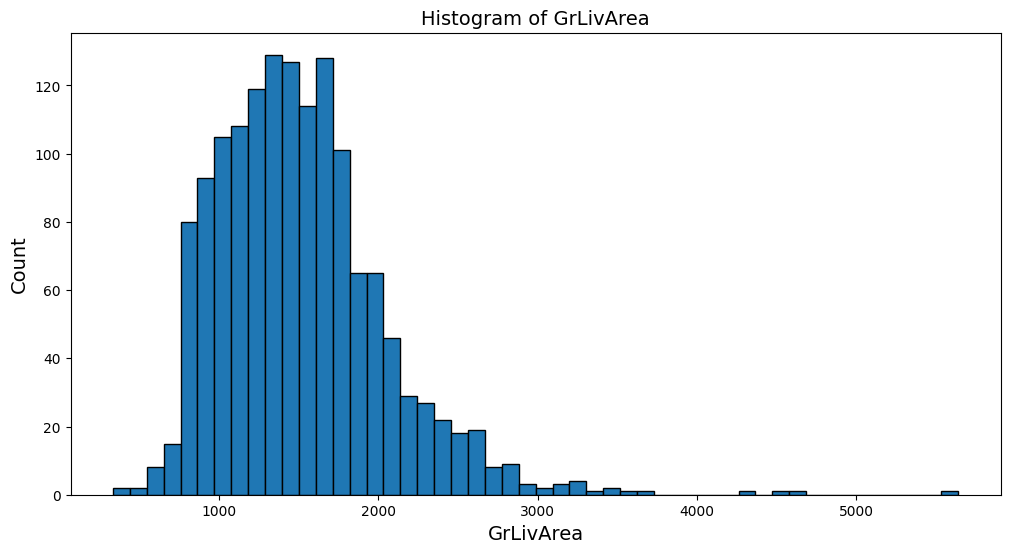

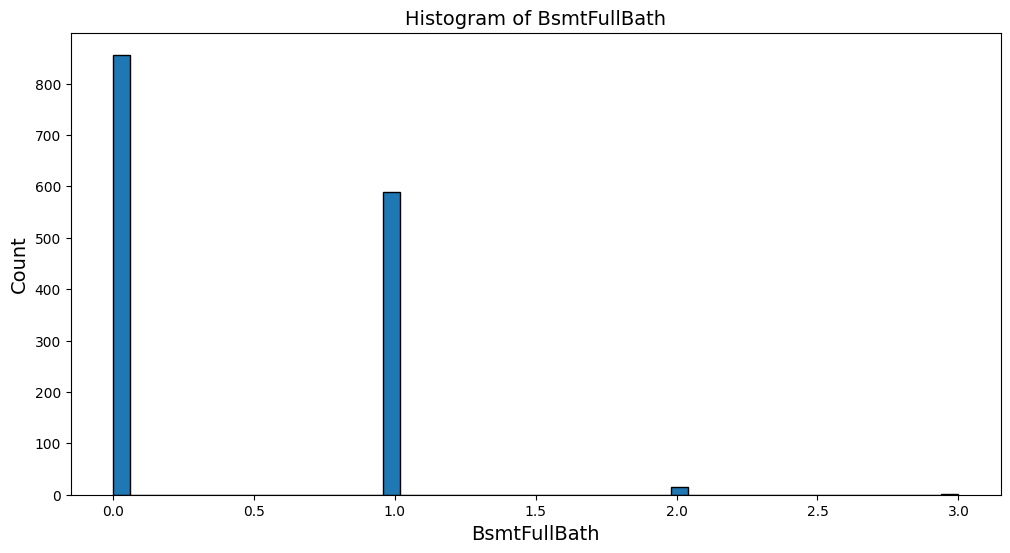

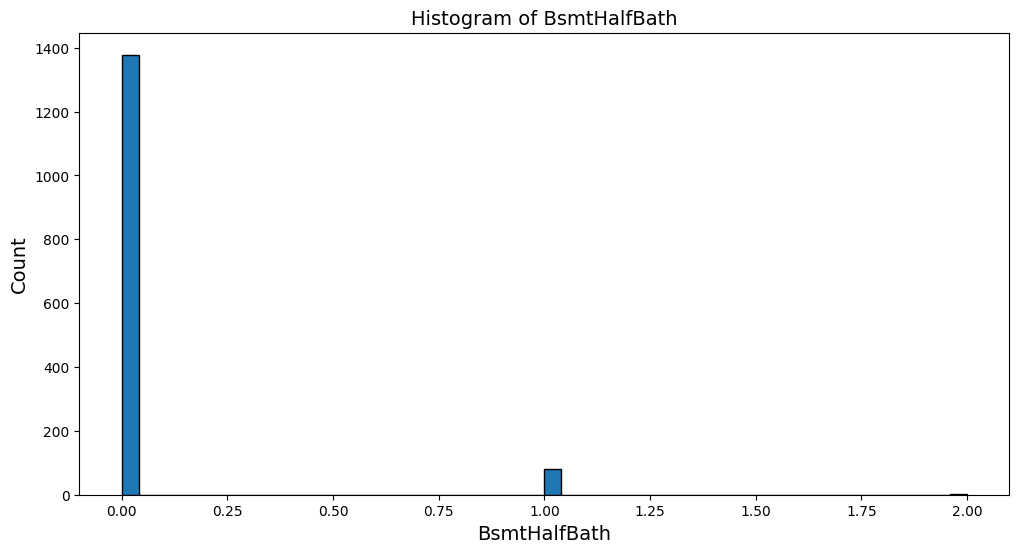

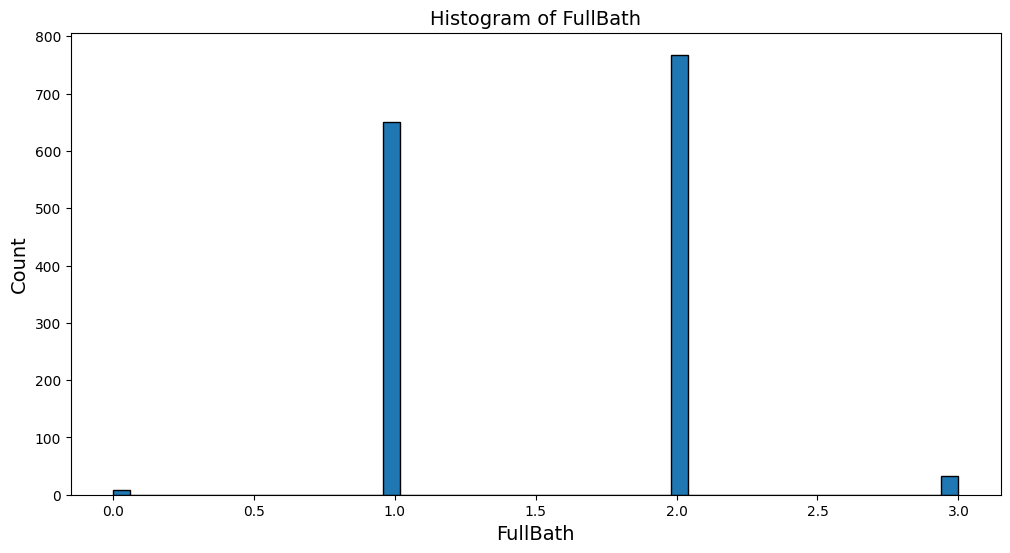

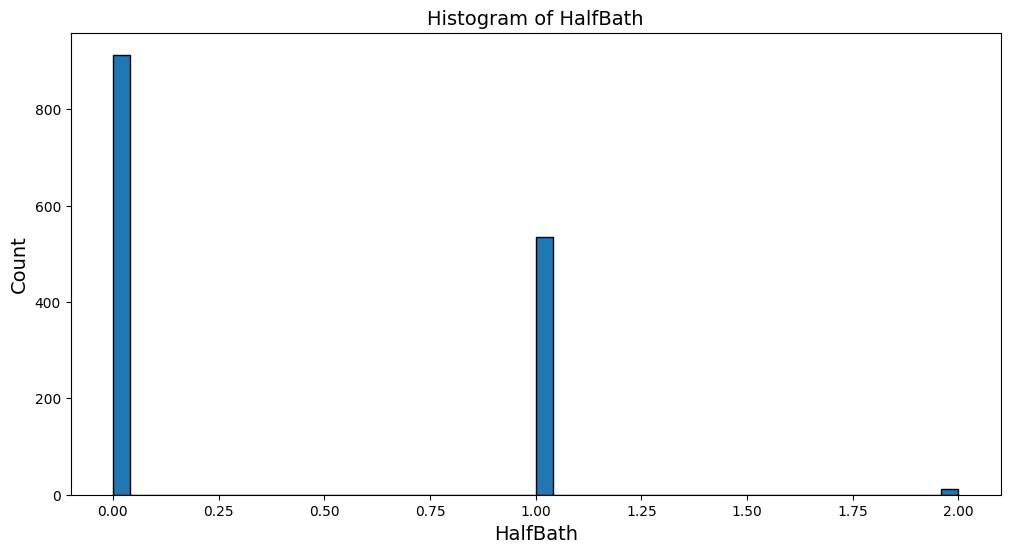

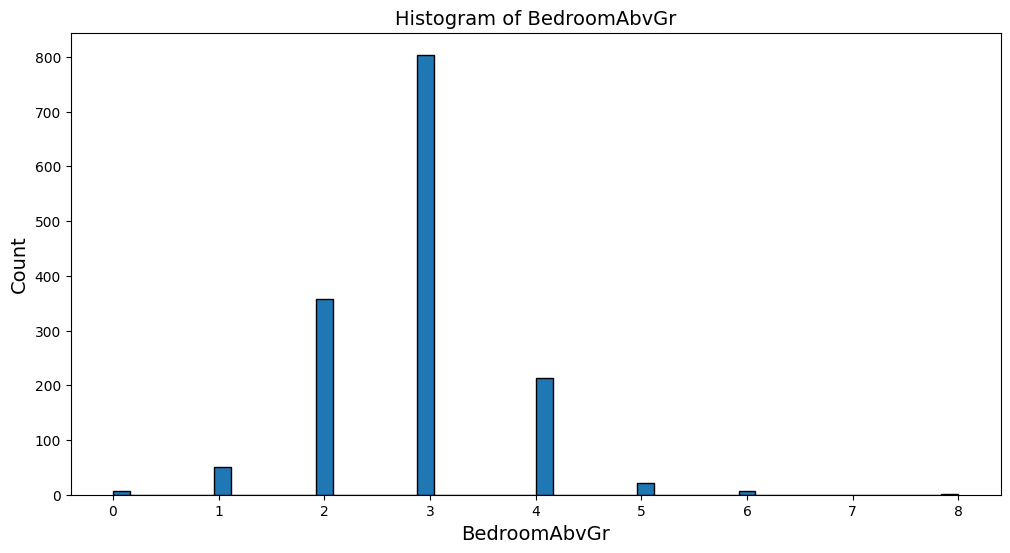

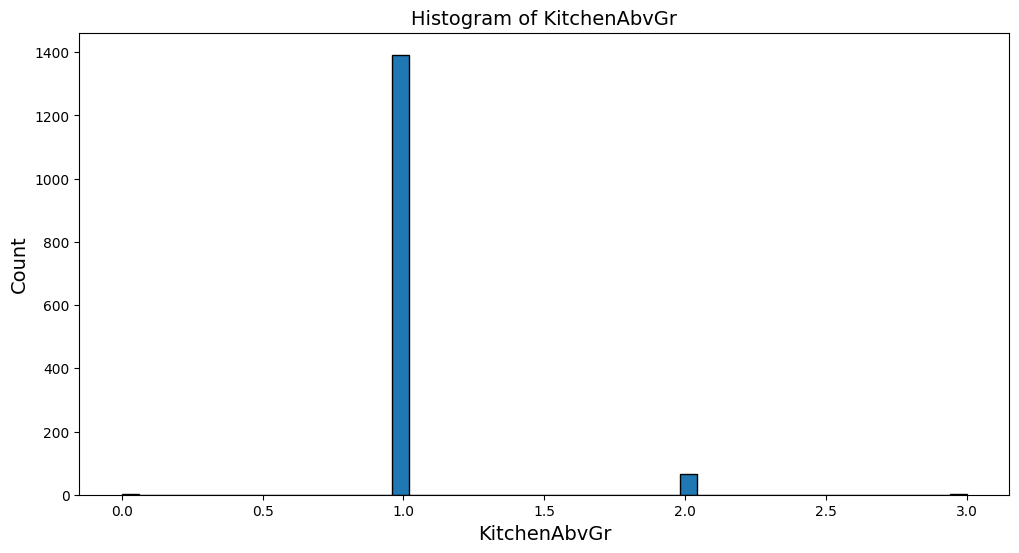

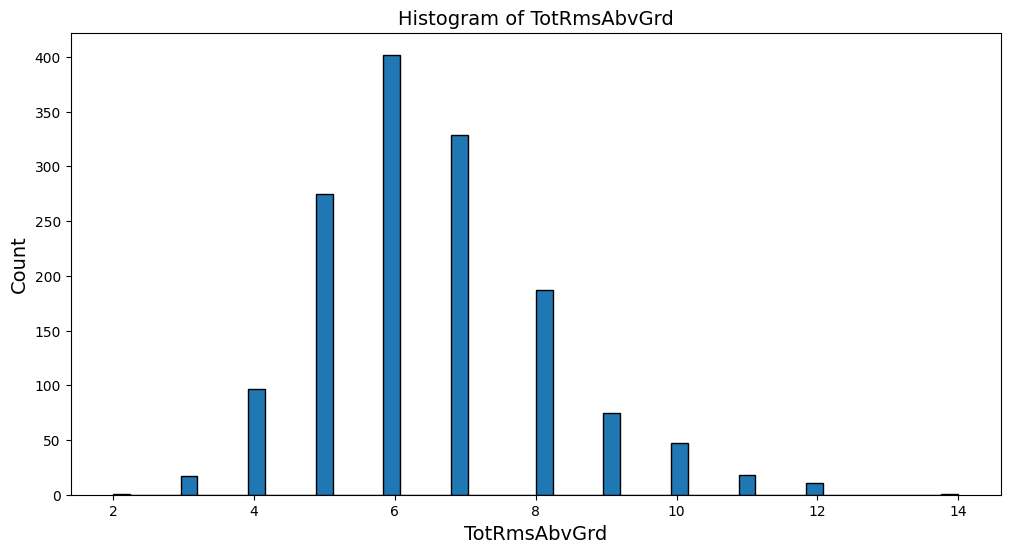

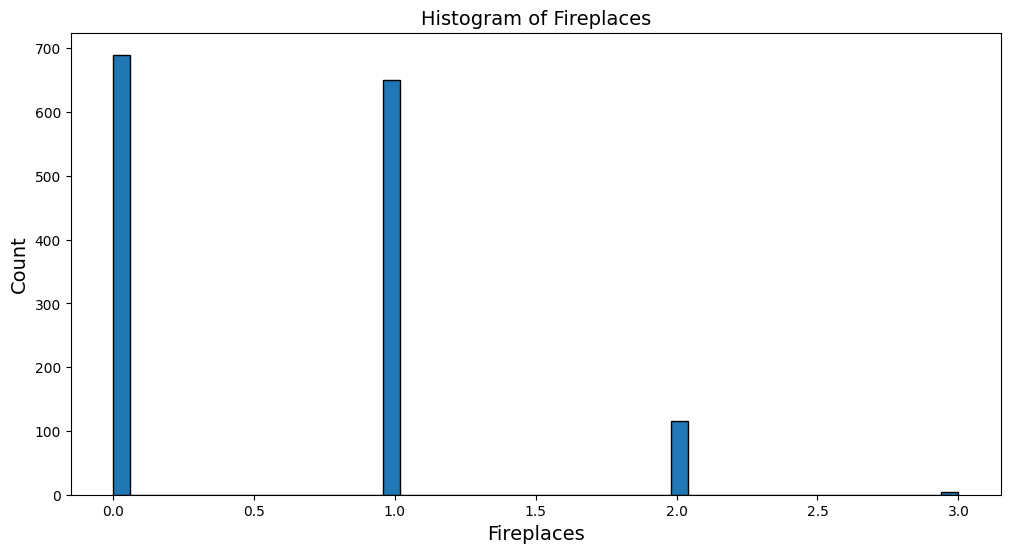

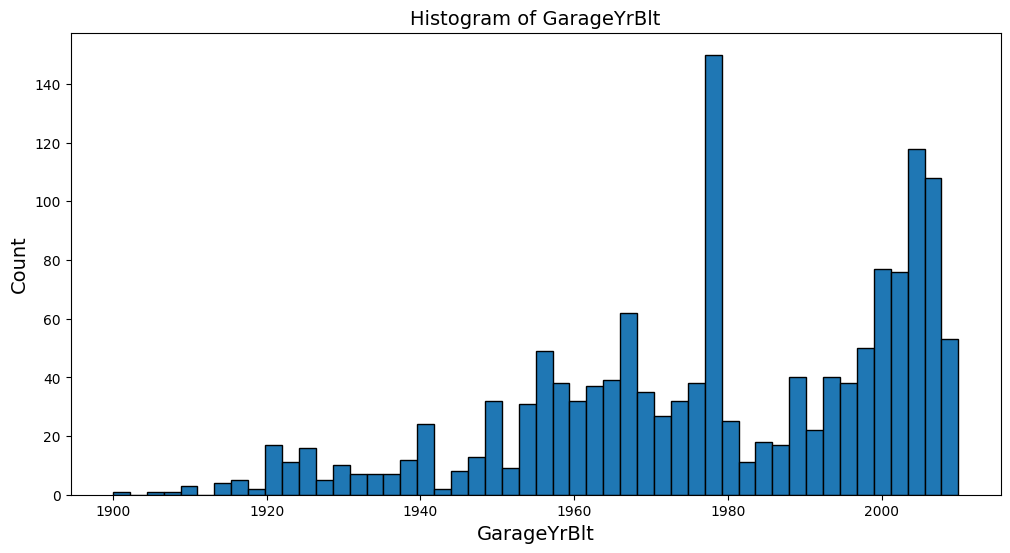

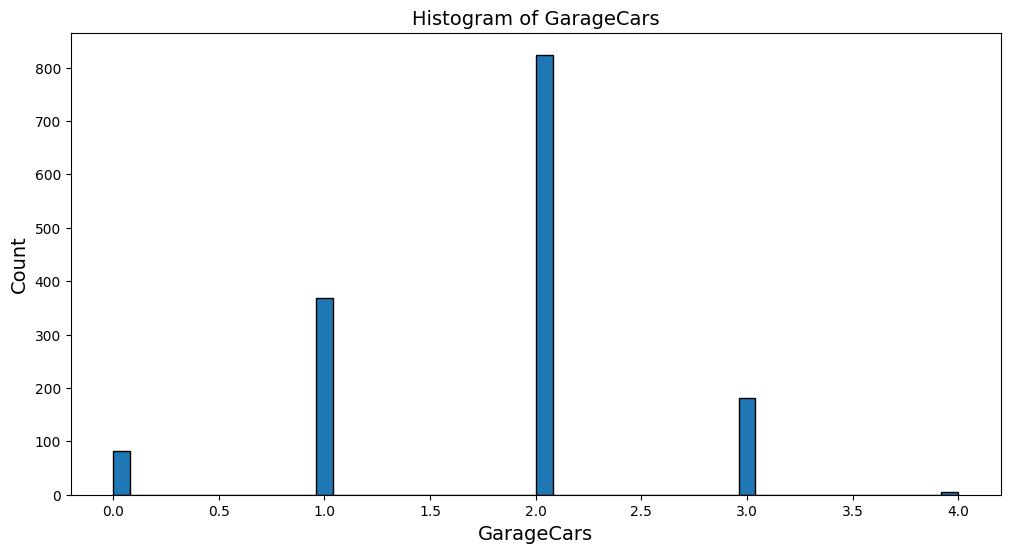

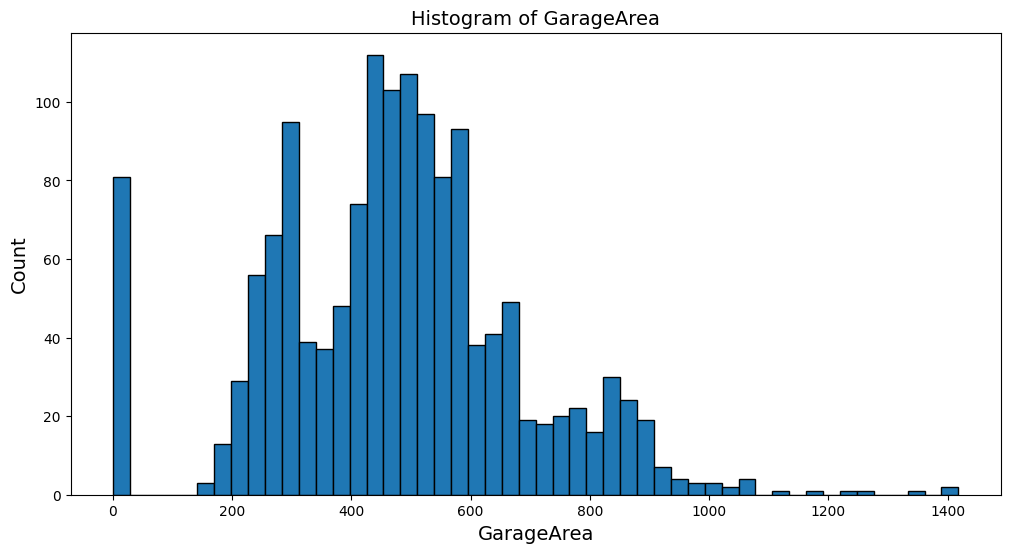

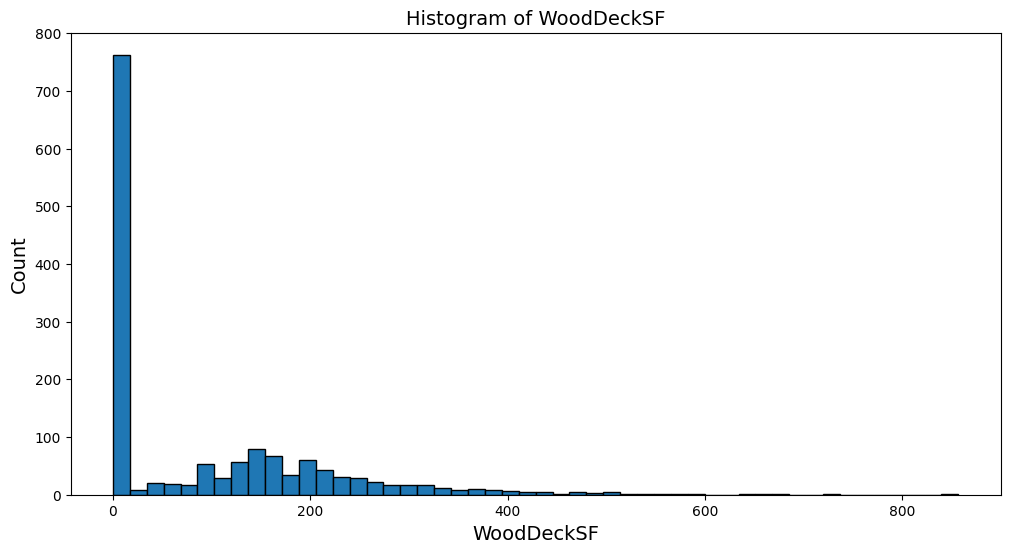

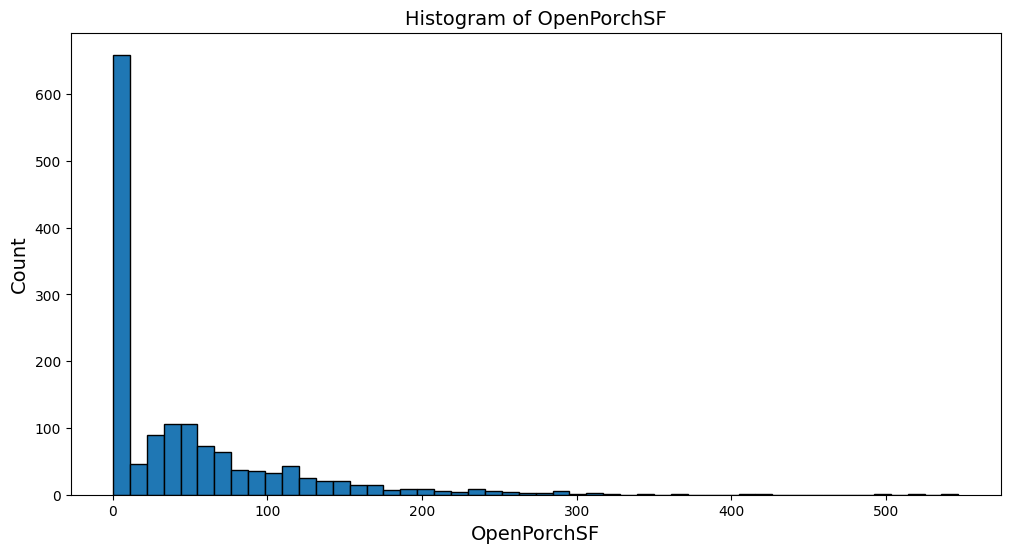

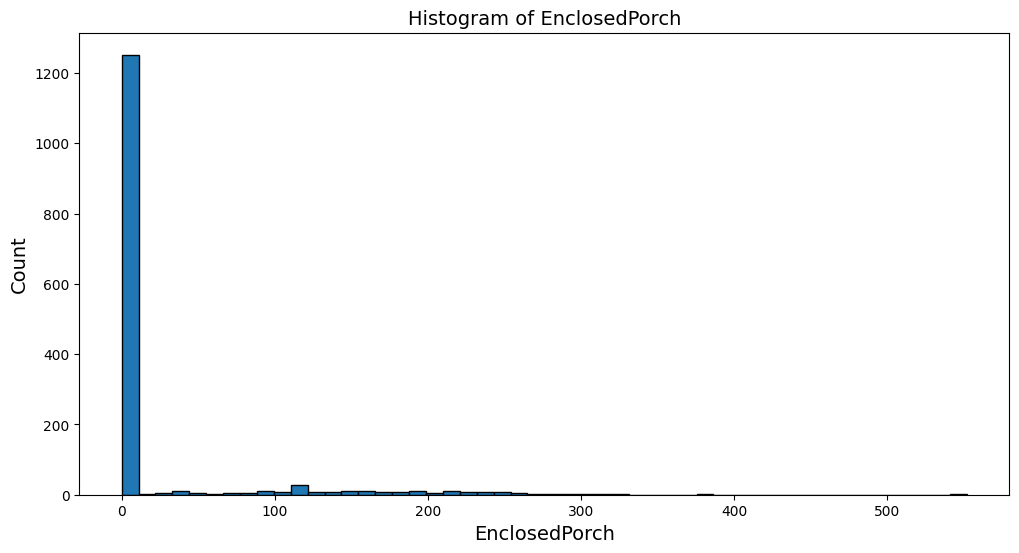

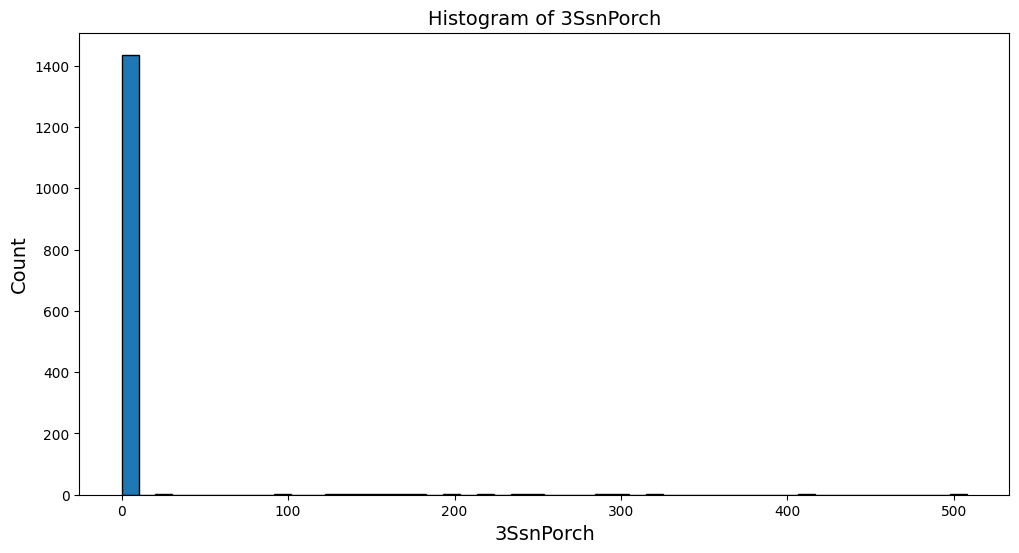

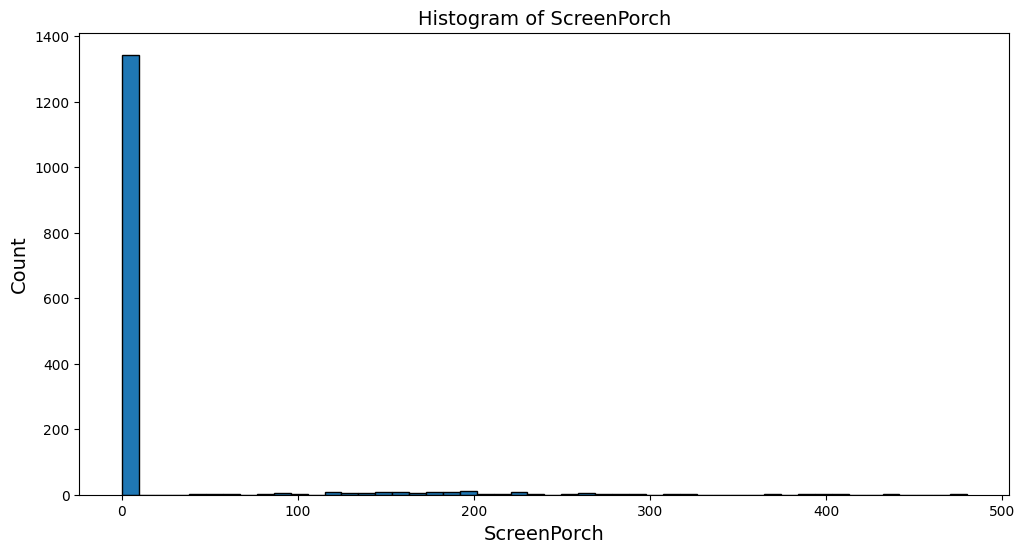

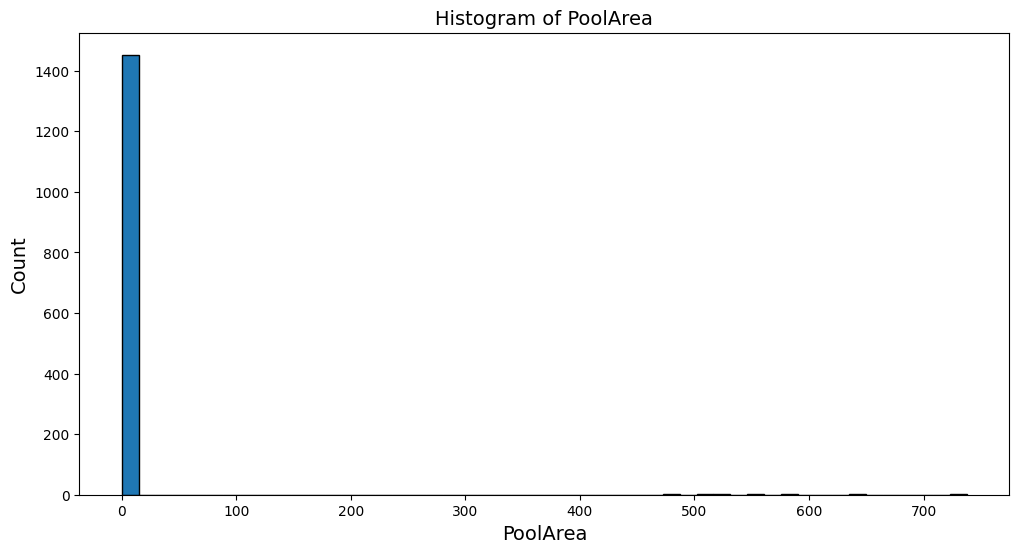

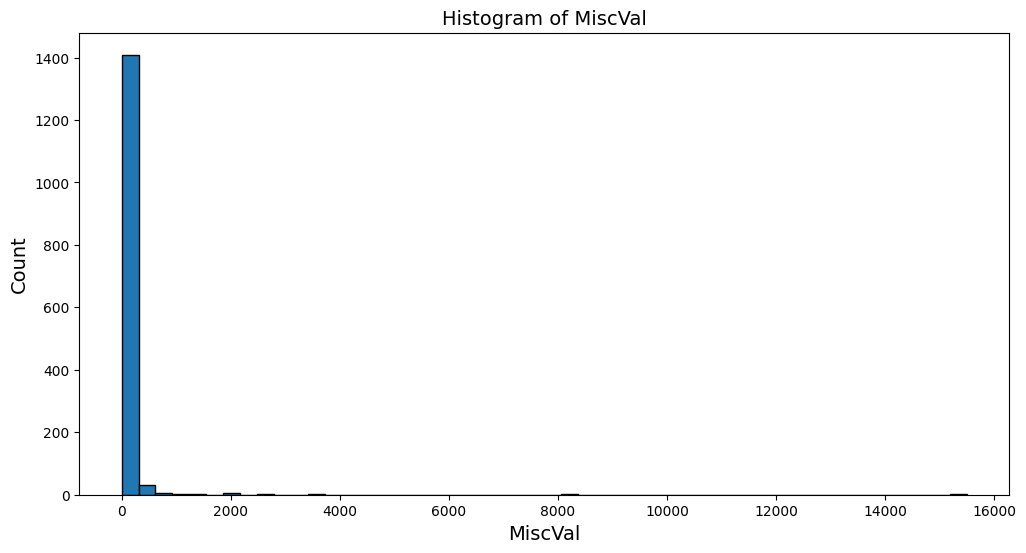

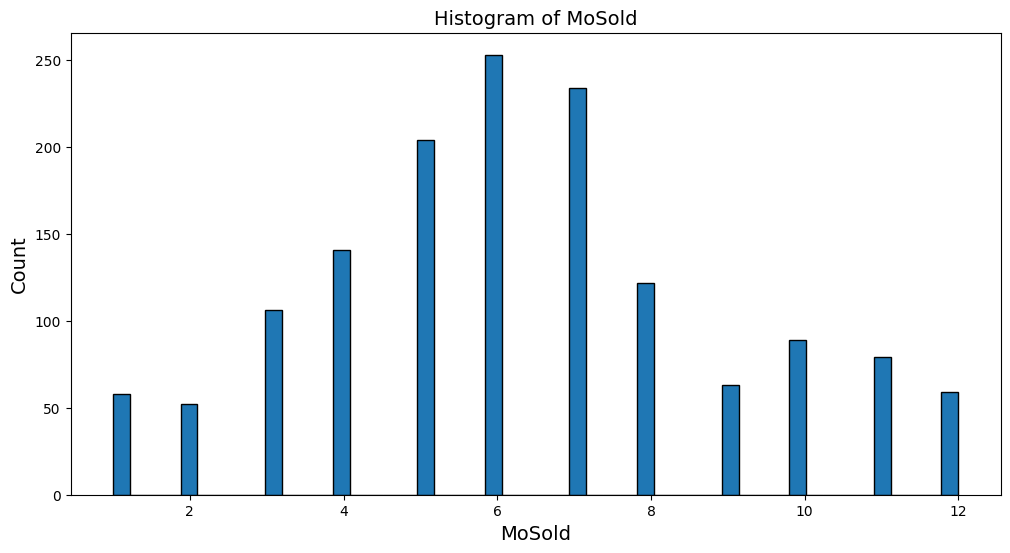

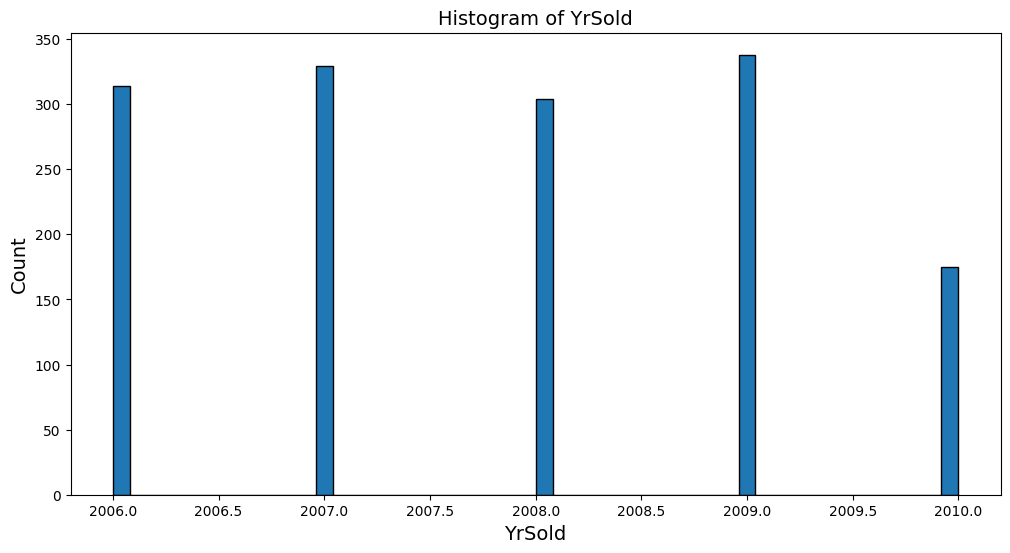

In [13]:
import matplotlib.pyplot as plt

# Set default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# List of numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features against SalePrice
for feature in numerical_features:
    if feature != 'SalePrice':  # Exclude the target column itself
        plt.figure(figsize=(12, 6))
        plt.hist(train[feature], bins=50, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()


In [14]:
features_to_normalise = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

# Small constant to avoid log(0)
epsilon = 1e-6

# Apply log normalization to each feature and update the train DataFrame
for col in features_to_normalise:
    train[col] = np.log(train[col] + epsilon)


In [15]:

features_vectors = ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea','GarageYrBlt',]

# Small constant to avoid sqrt(0)
epsilon = 1e-6

# Apply square root normalization to each feature
for col in features_vectors:
    train[col] = np.sqrt(train[col] + epsilon)

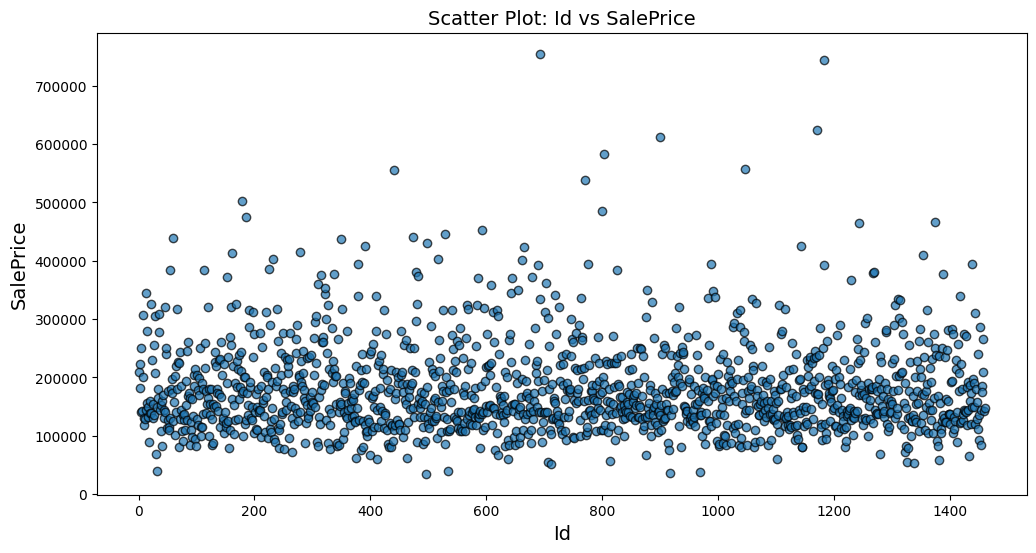

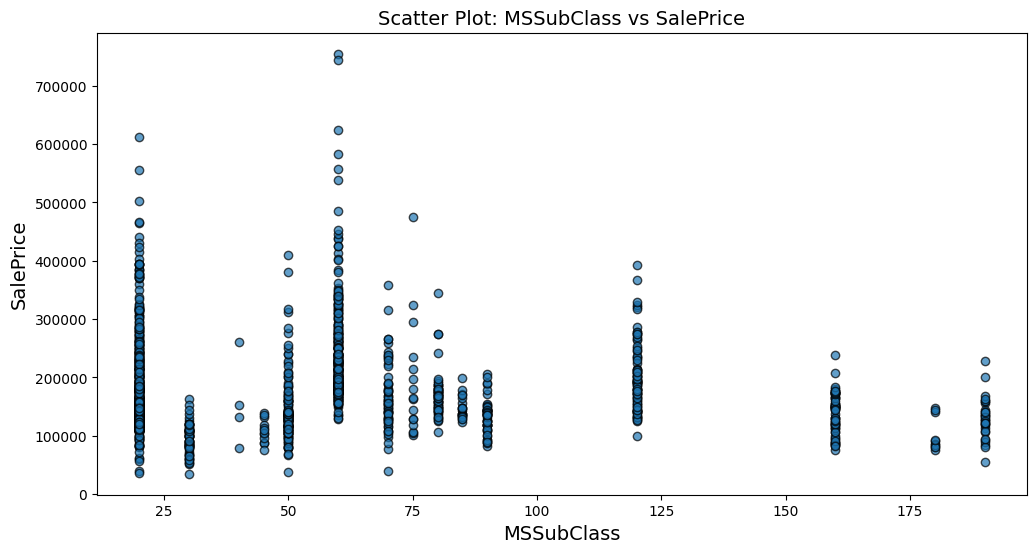

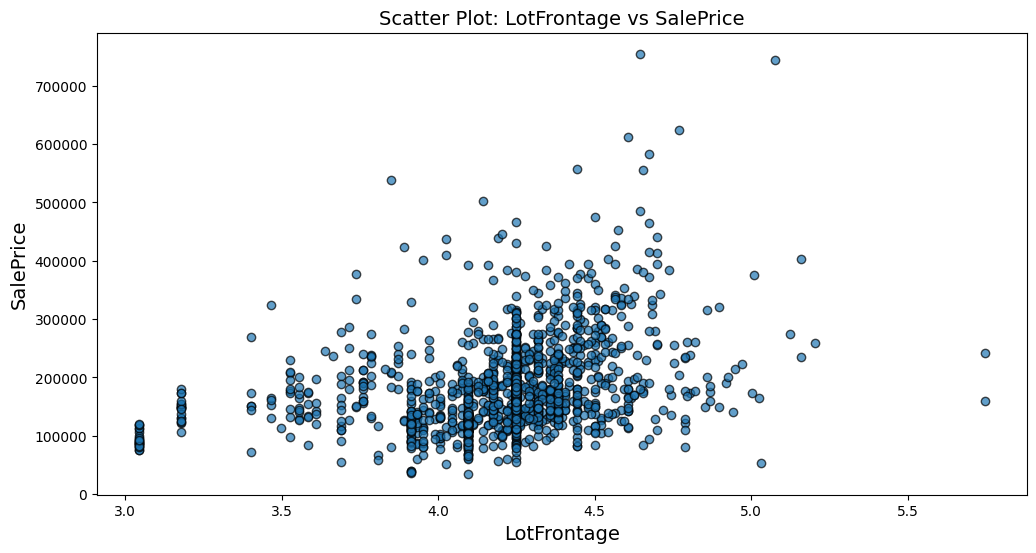

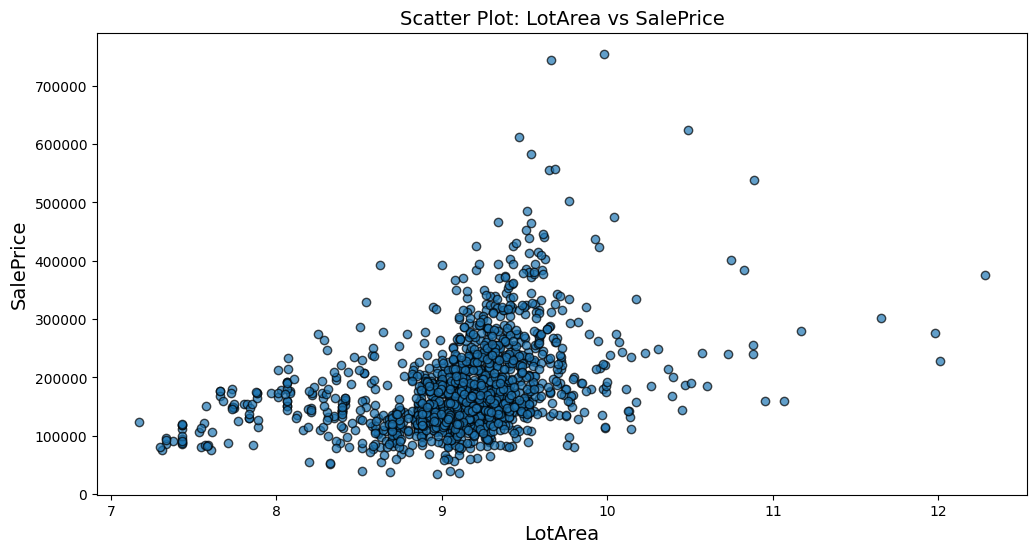

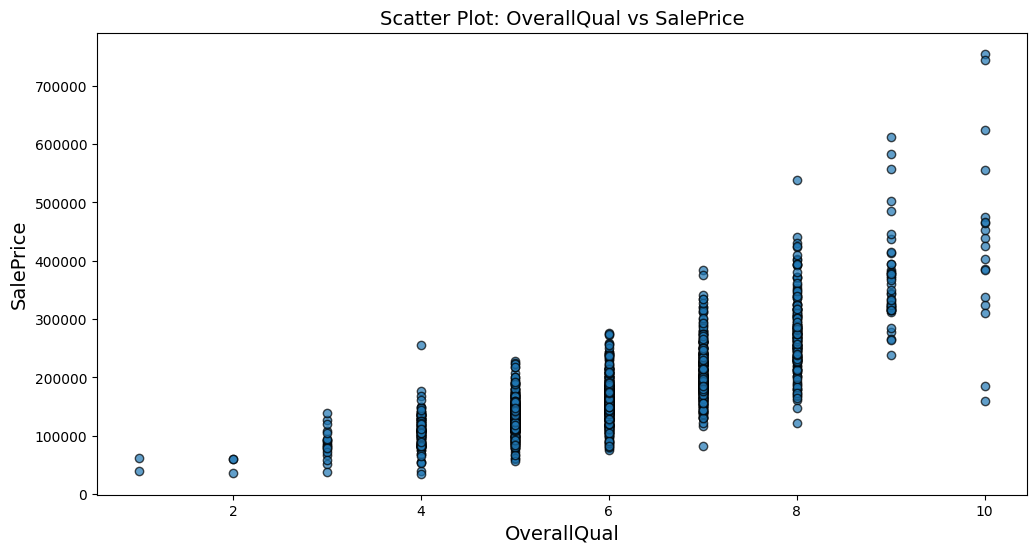

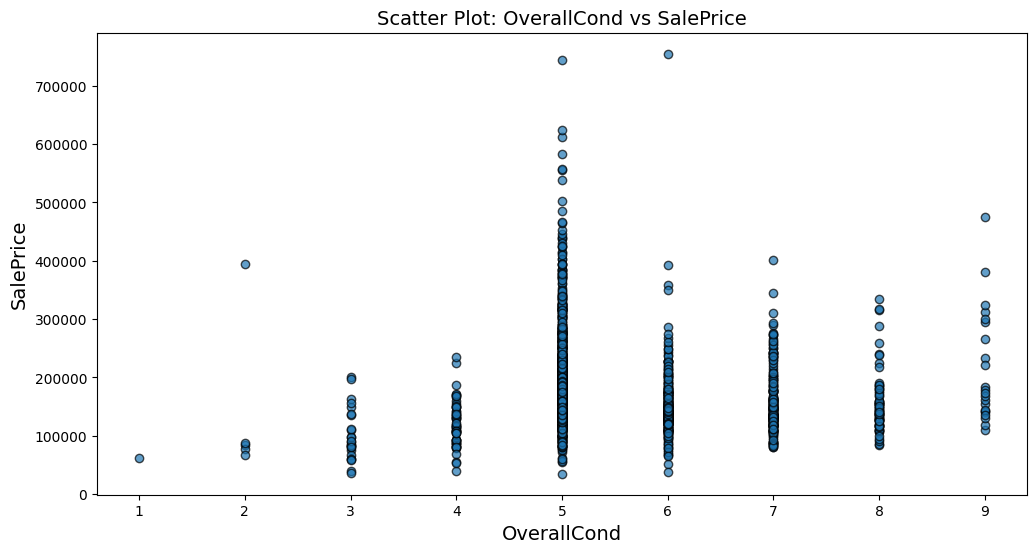

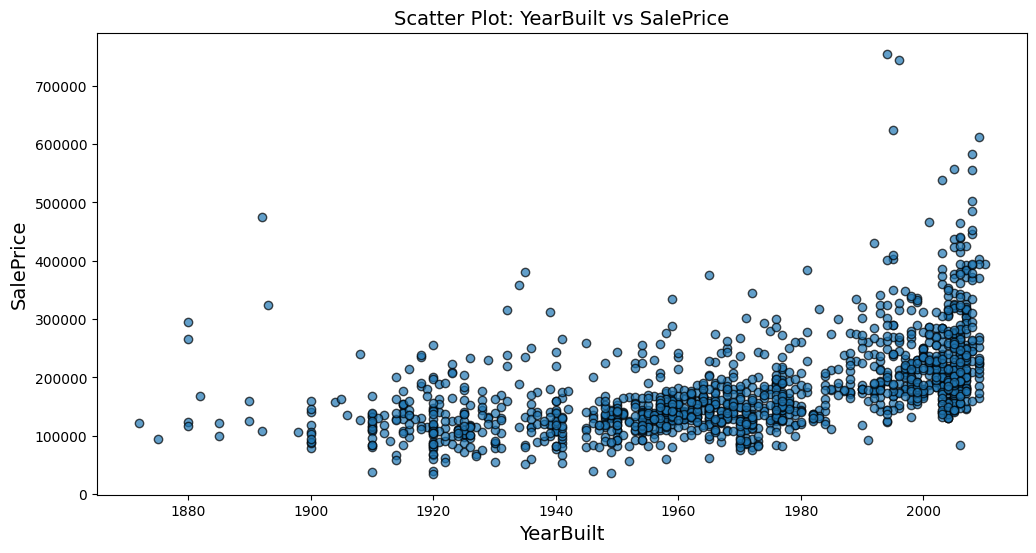

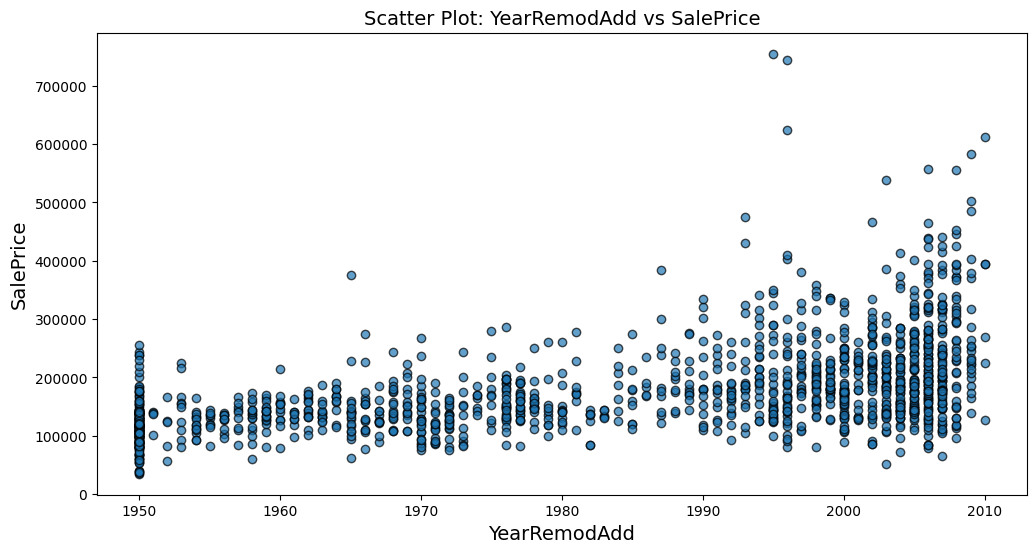

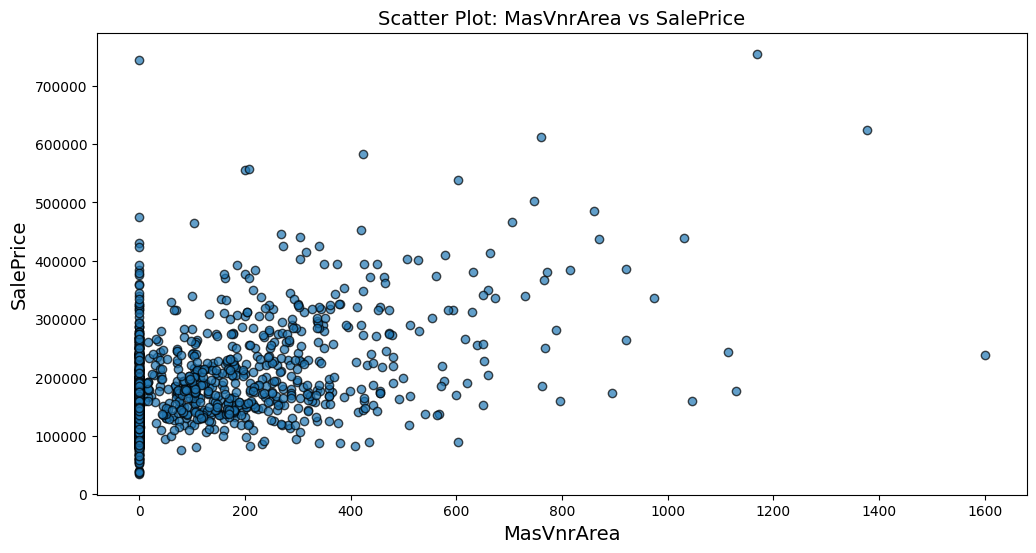

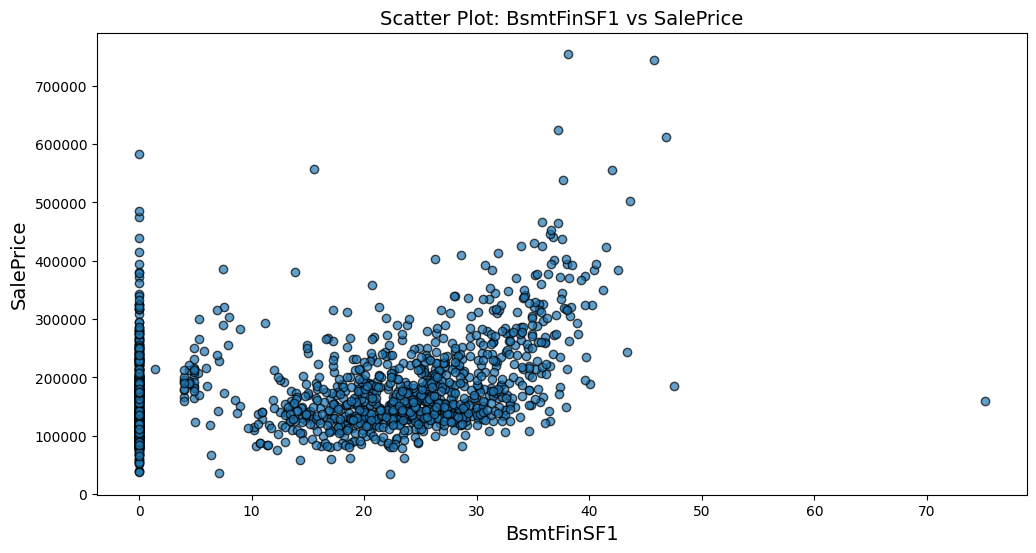

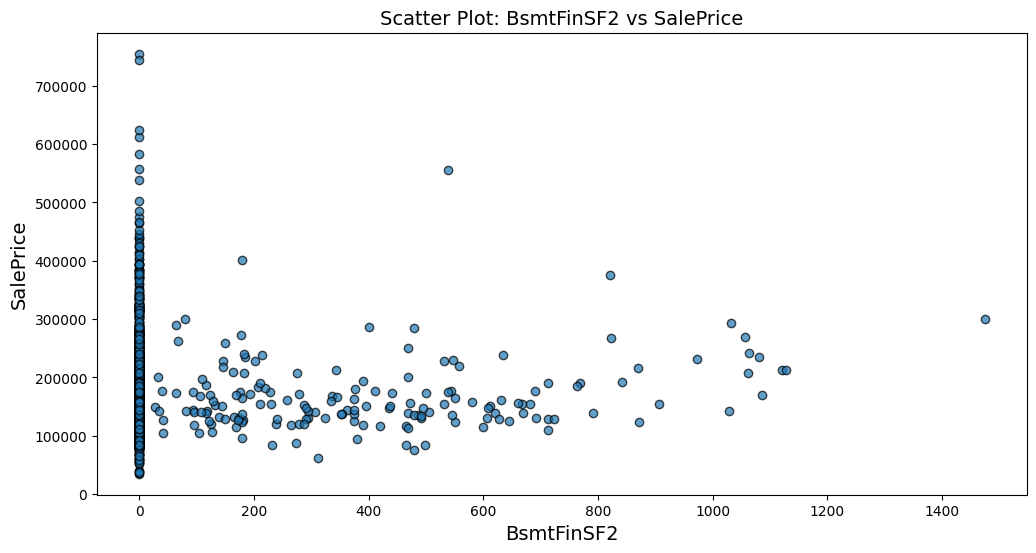

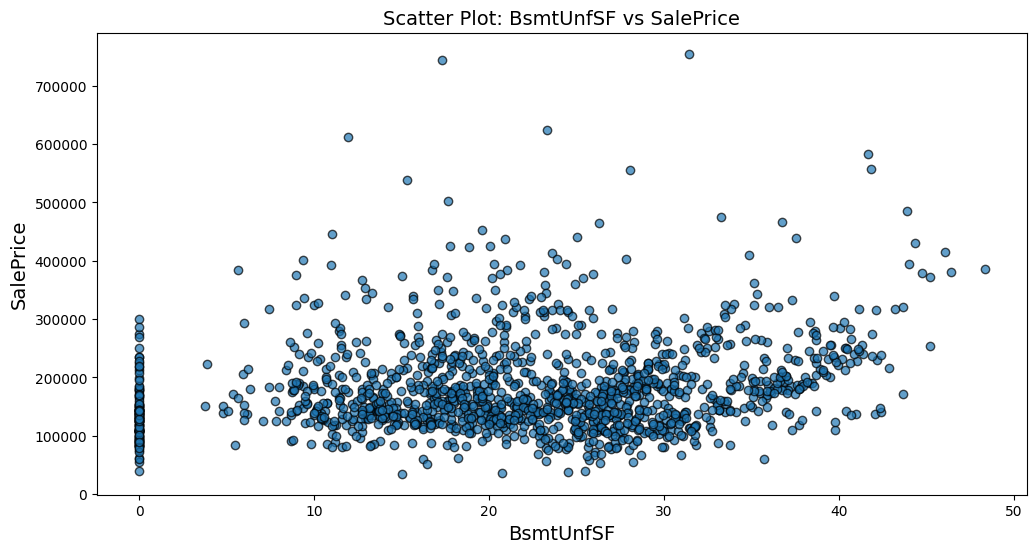

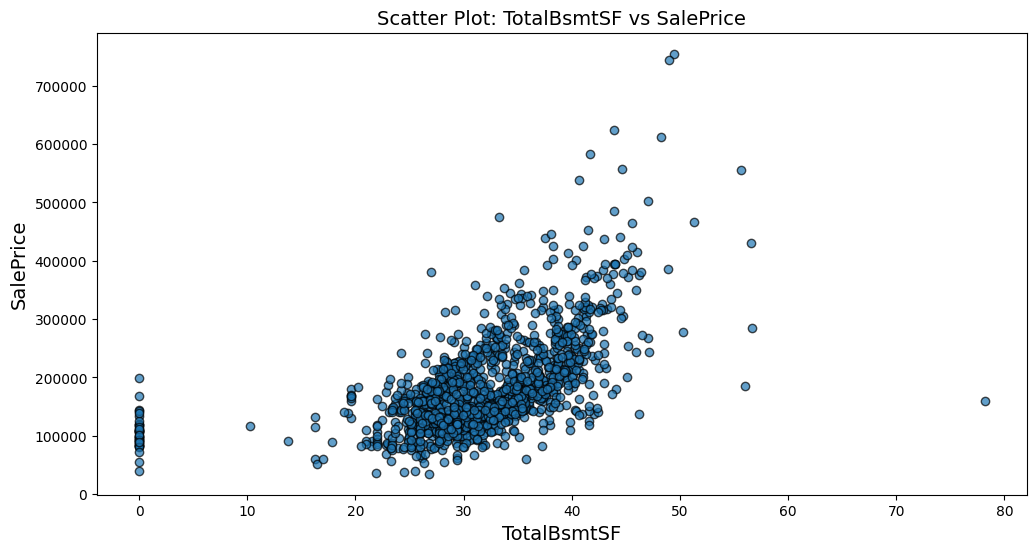

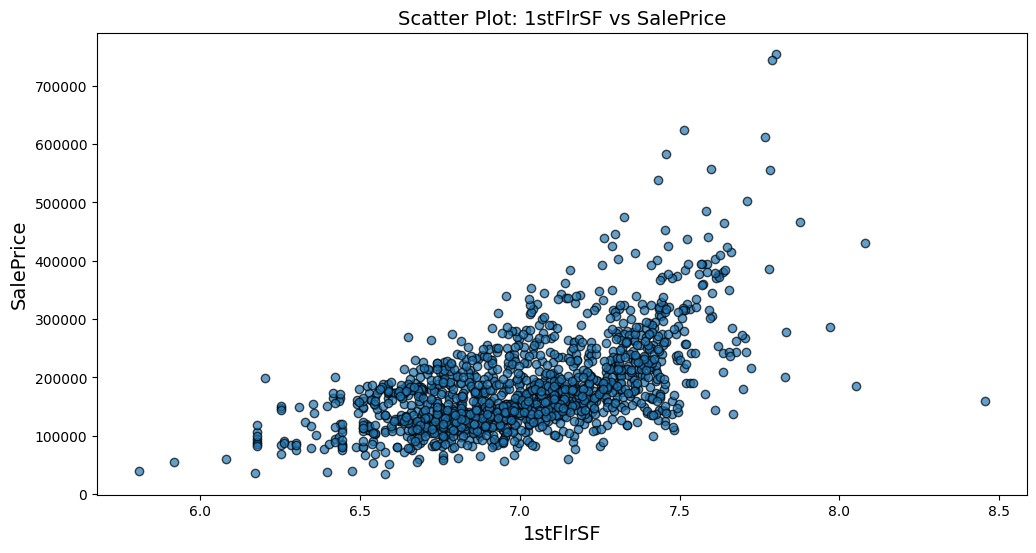

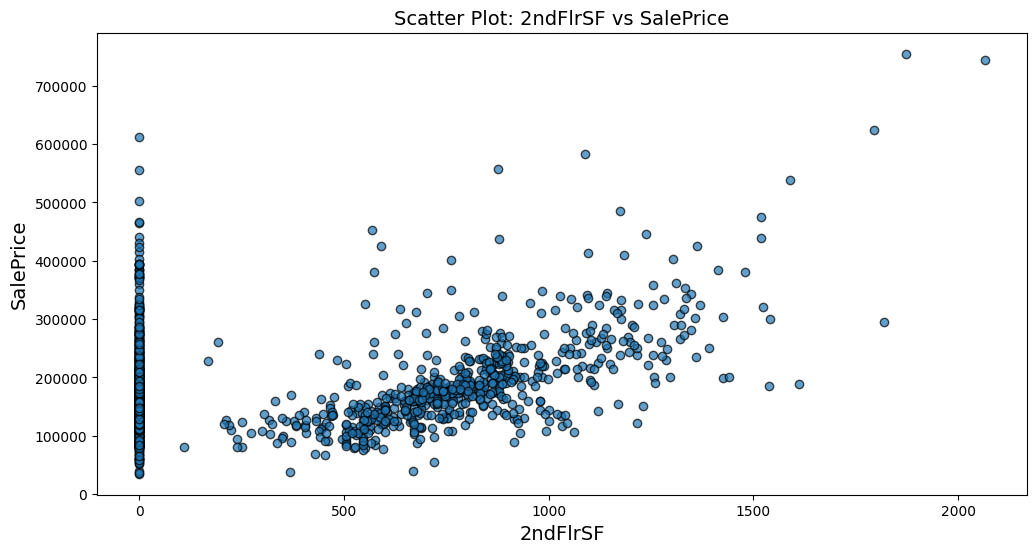

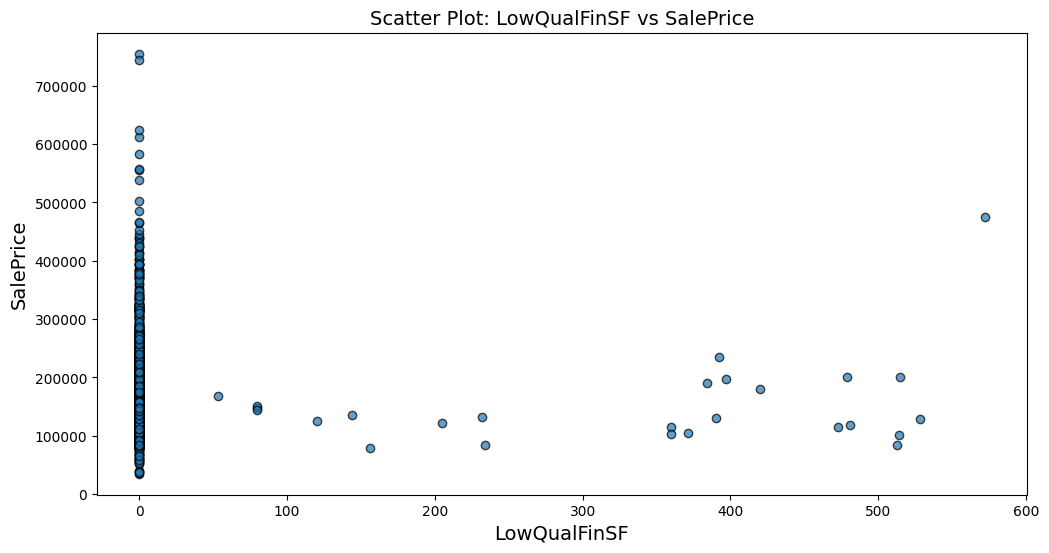

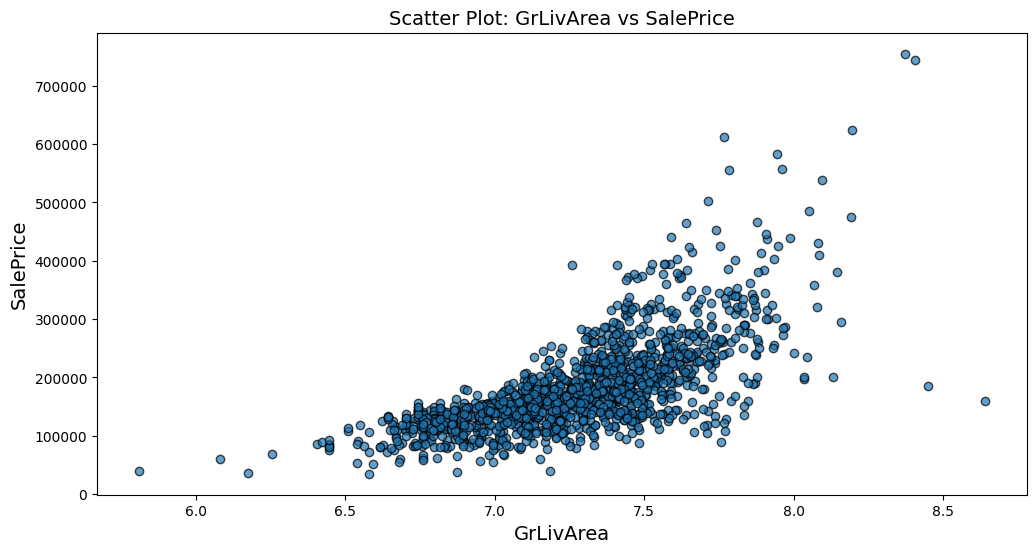

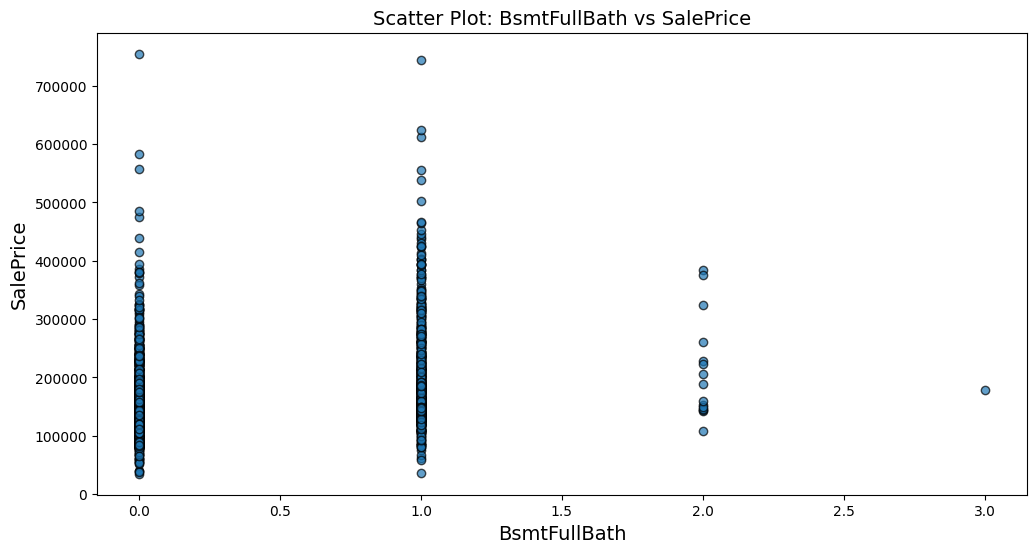

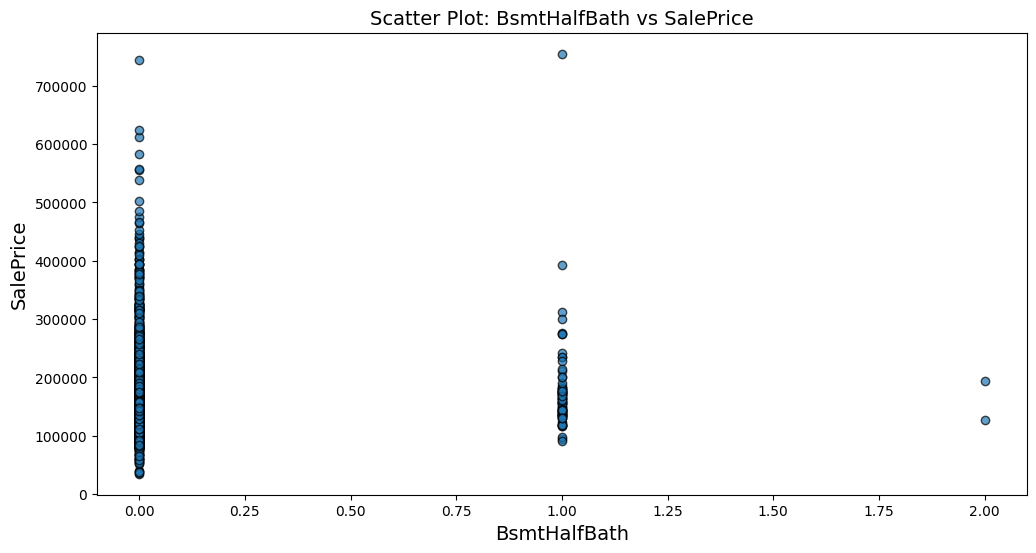

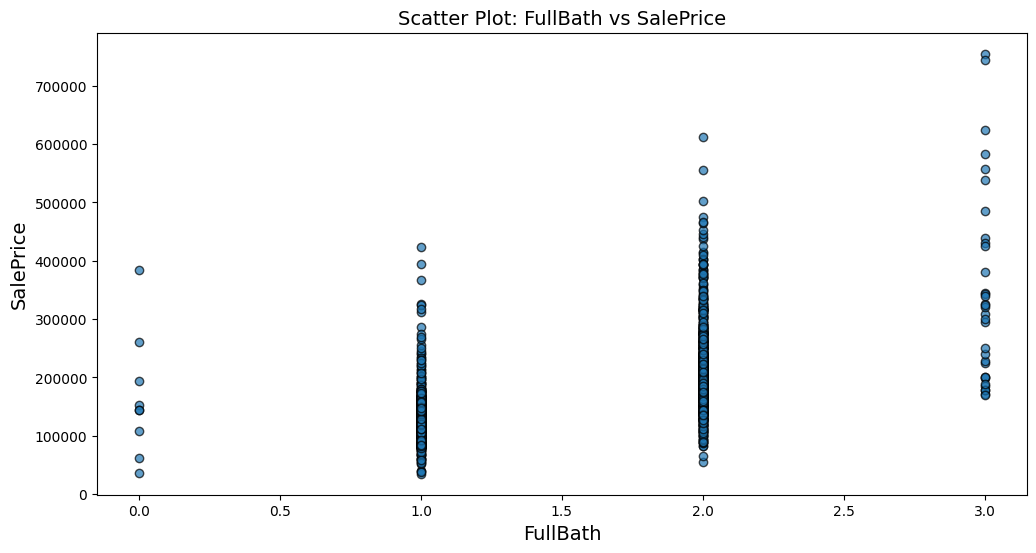

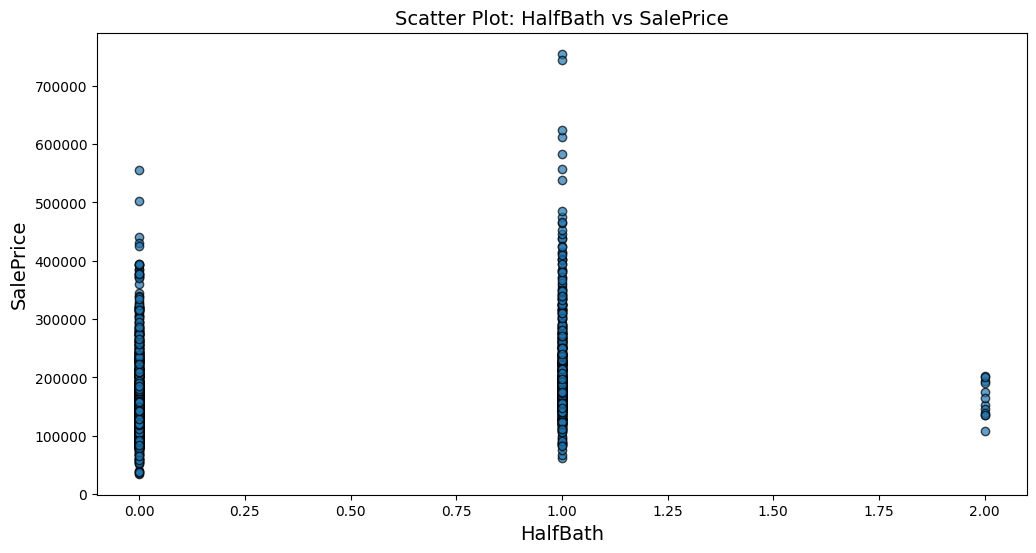

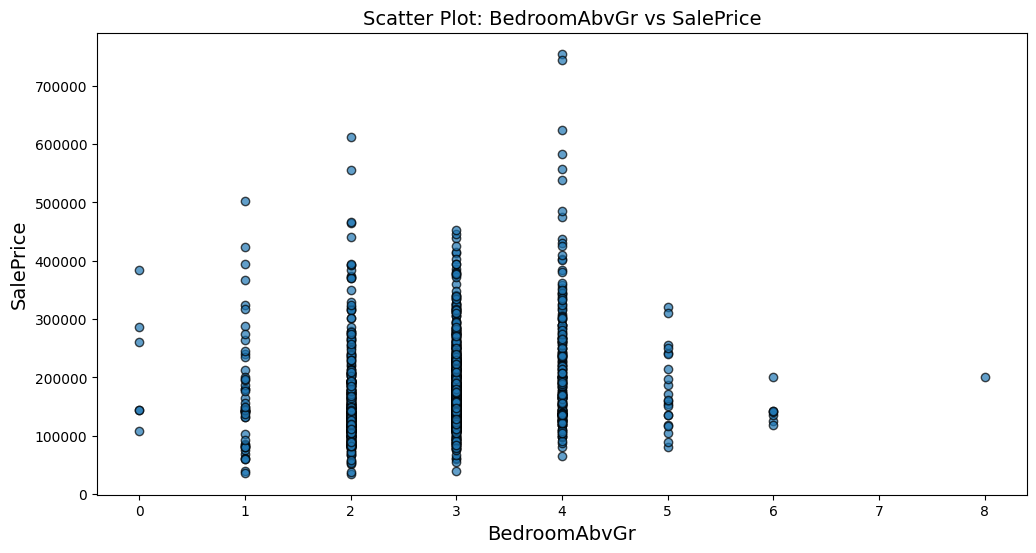

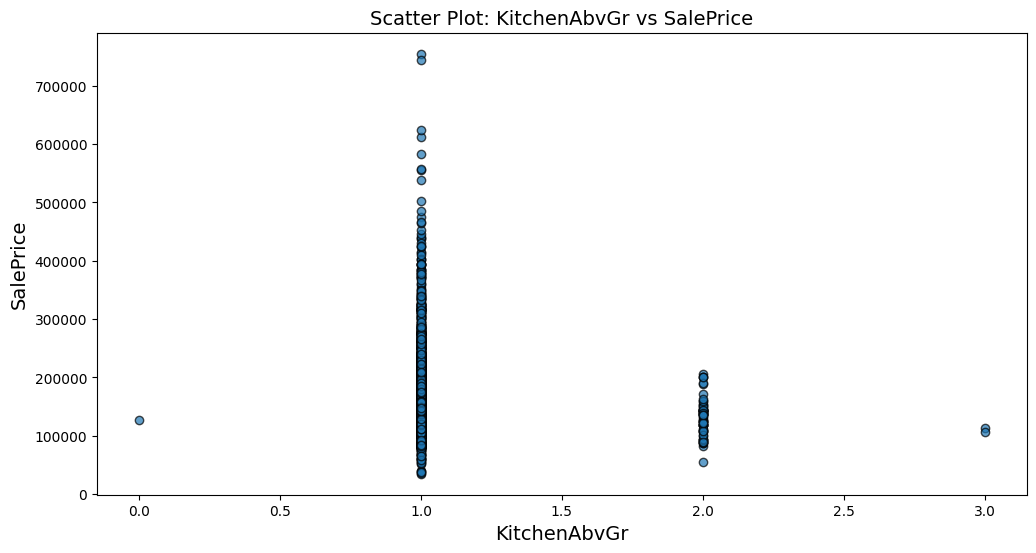

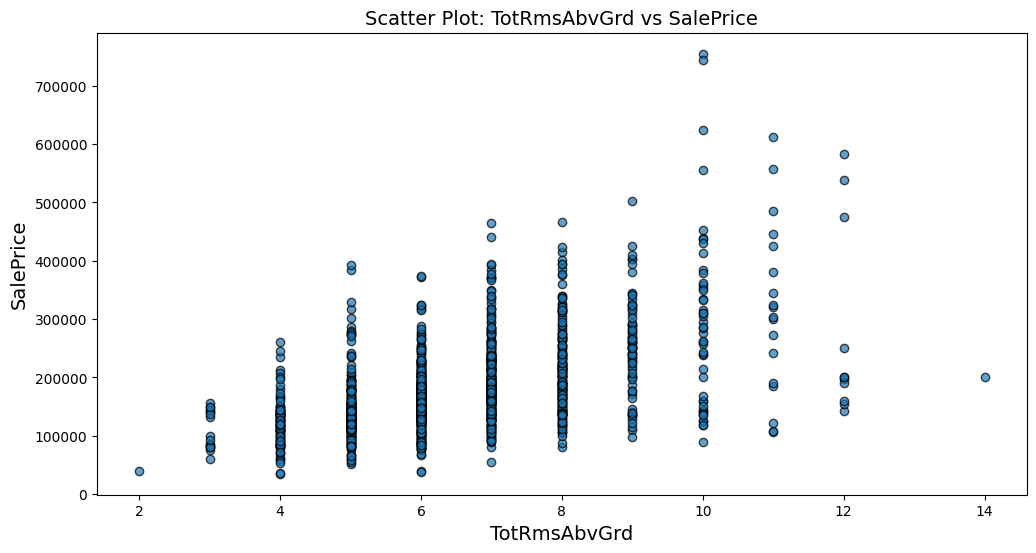

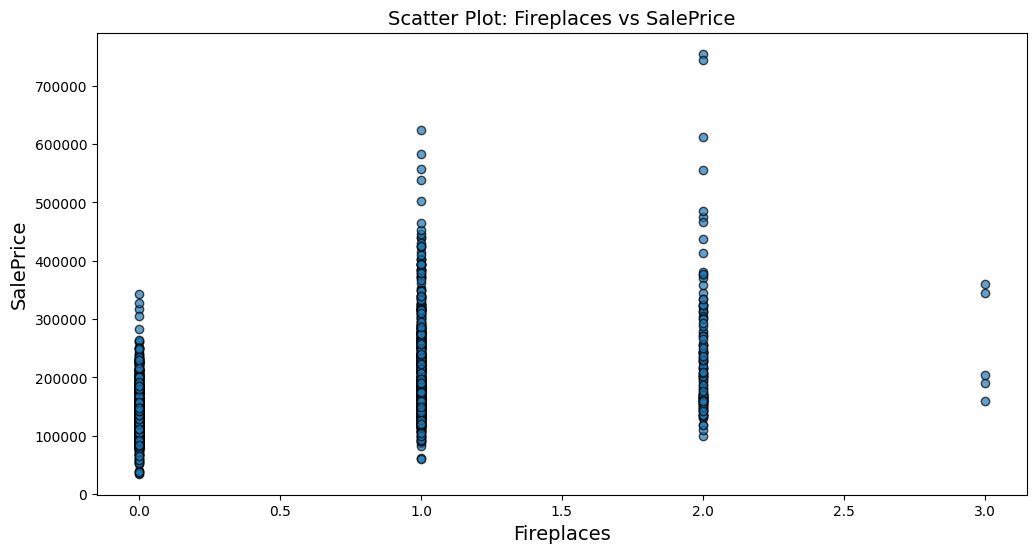

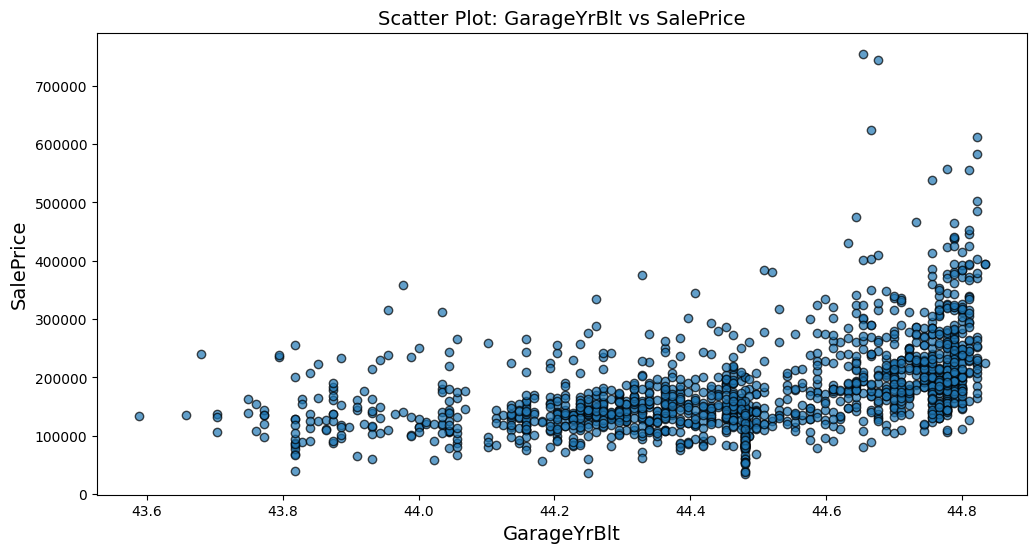

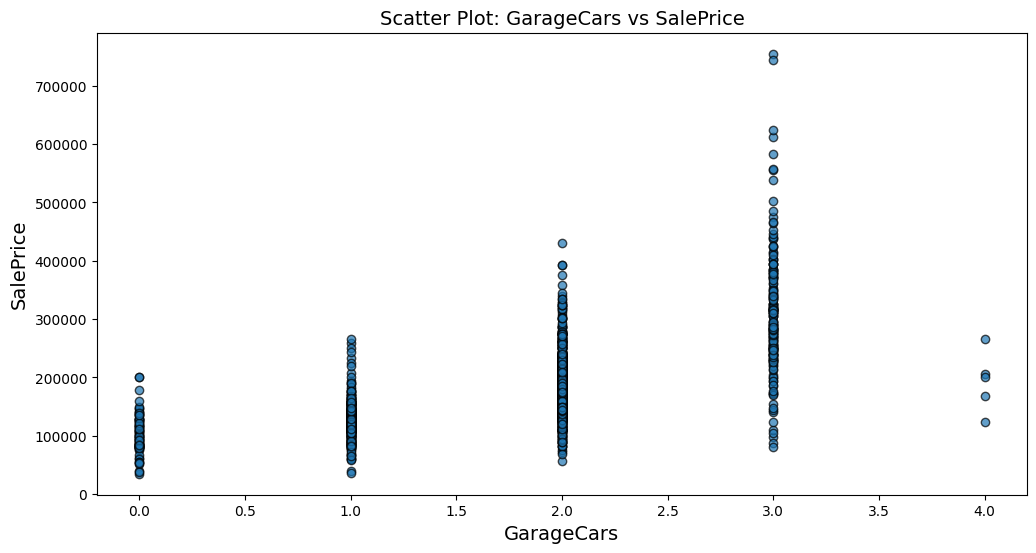

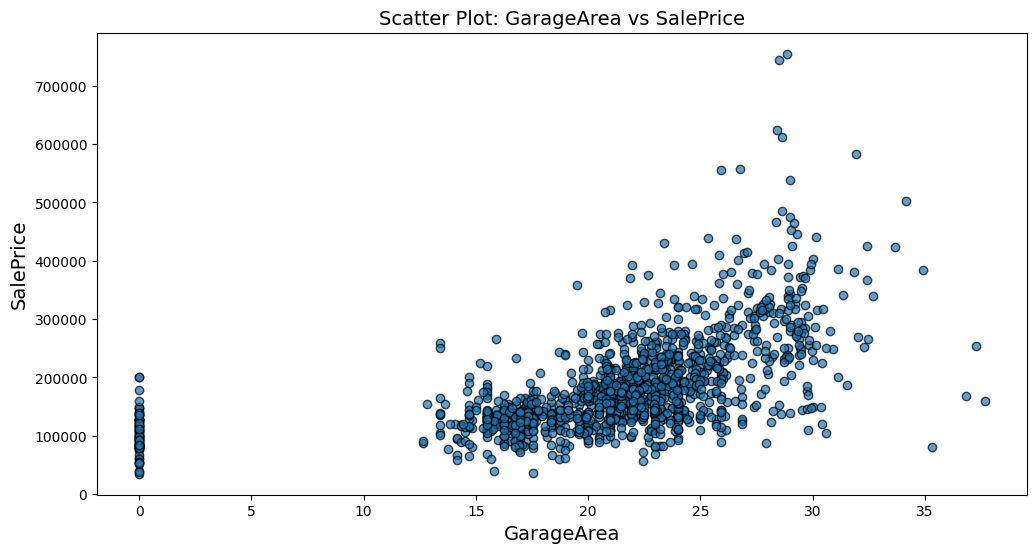

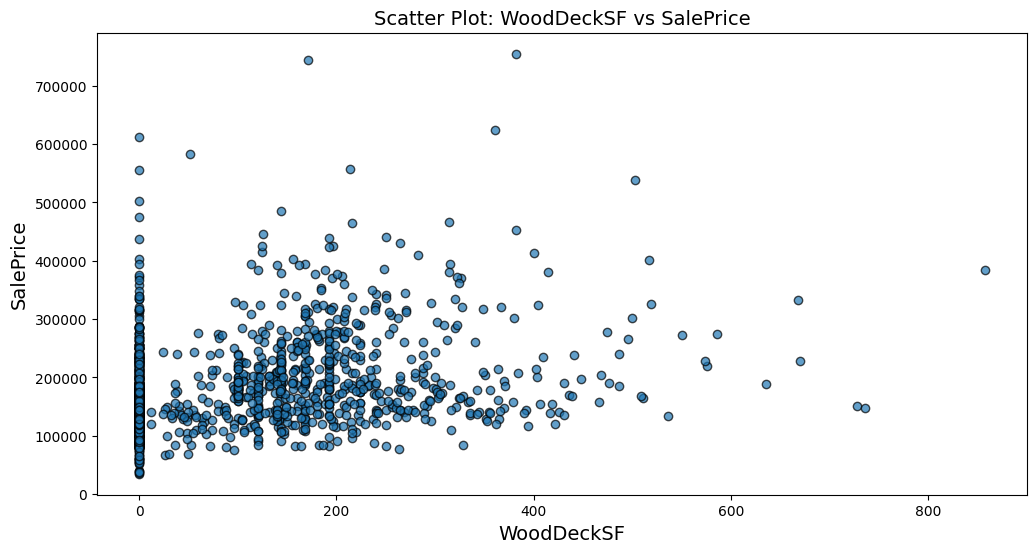

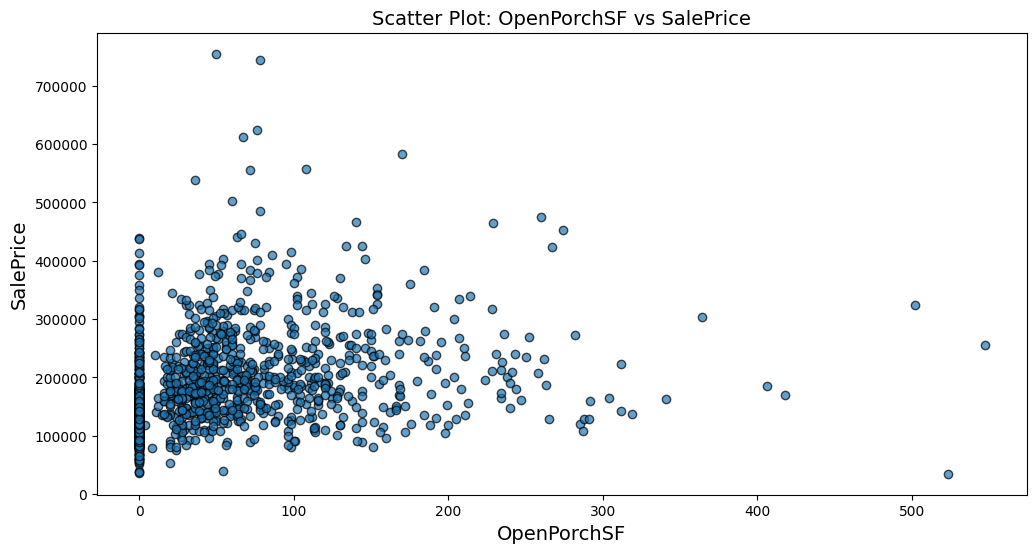

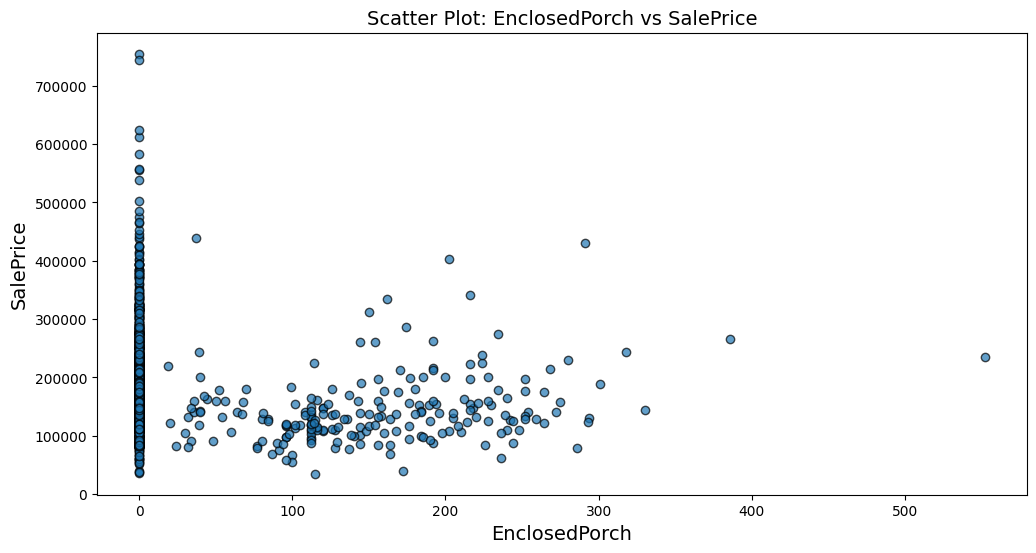

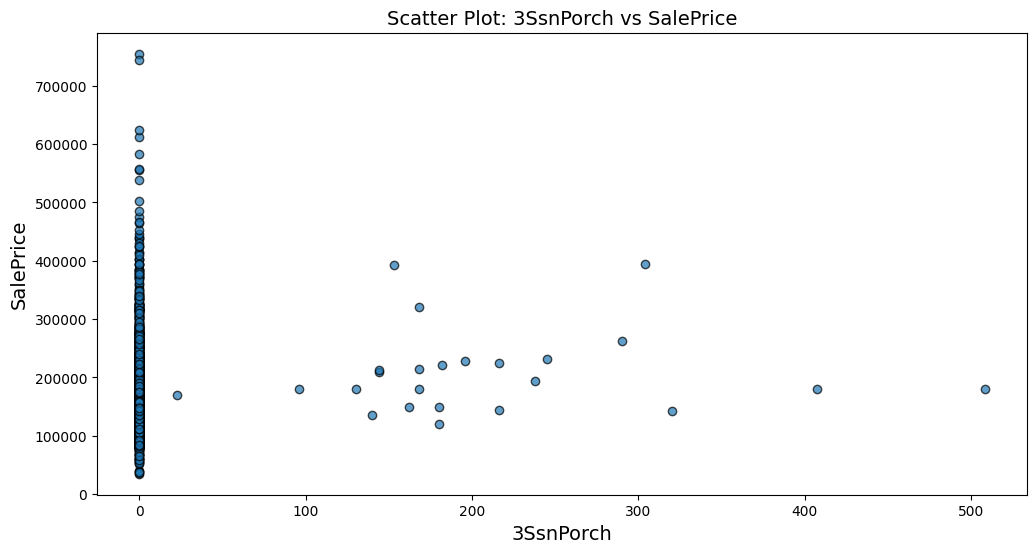

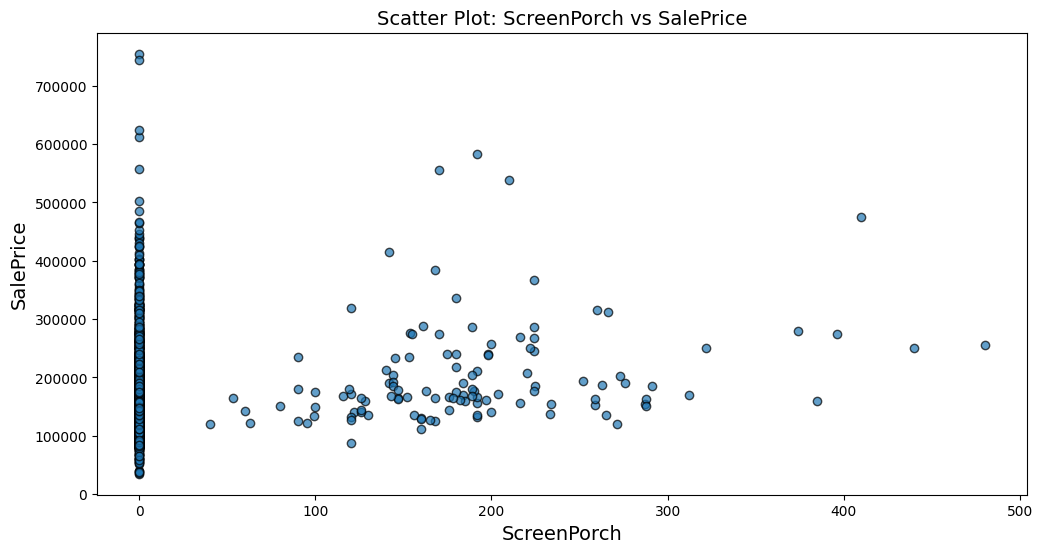

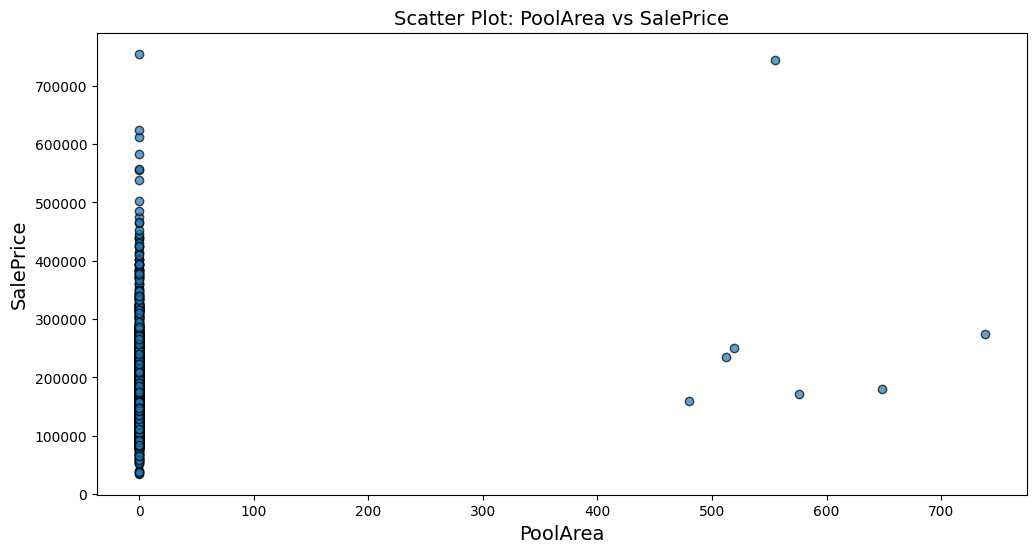

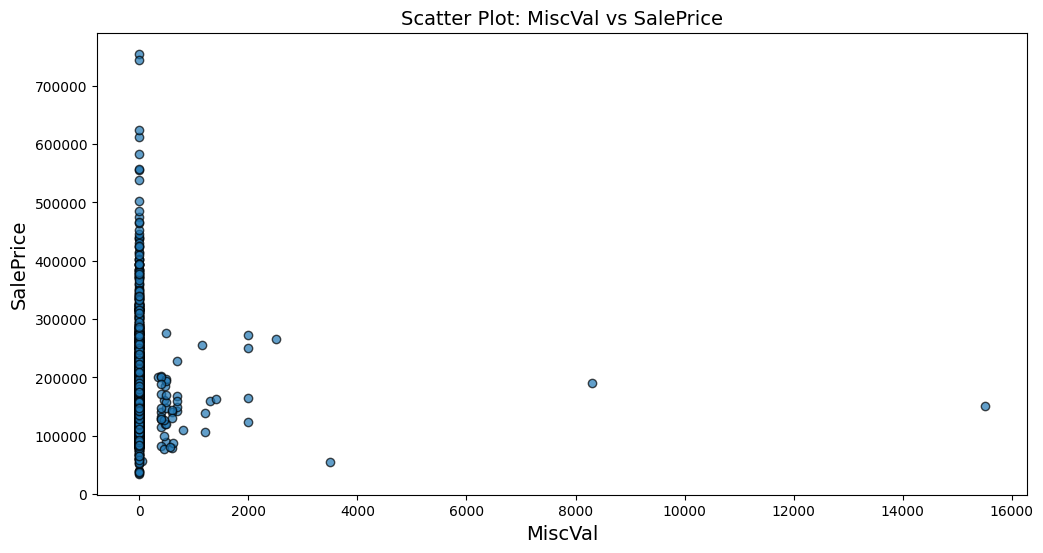

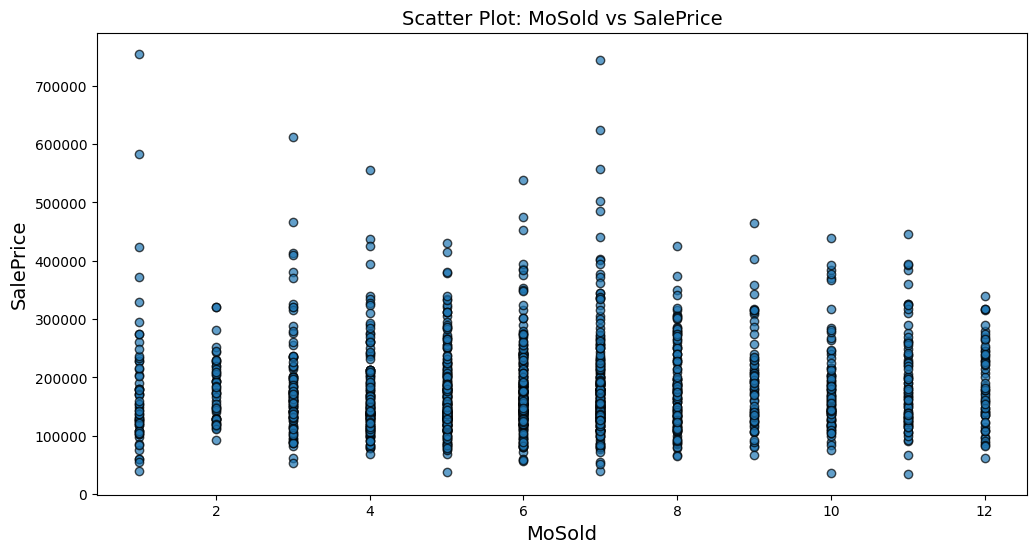

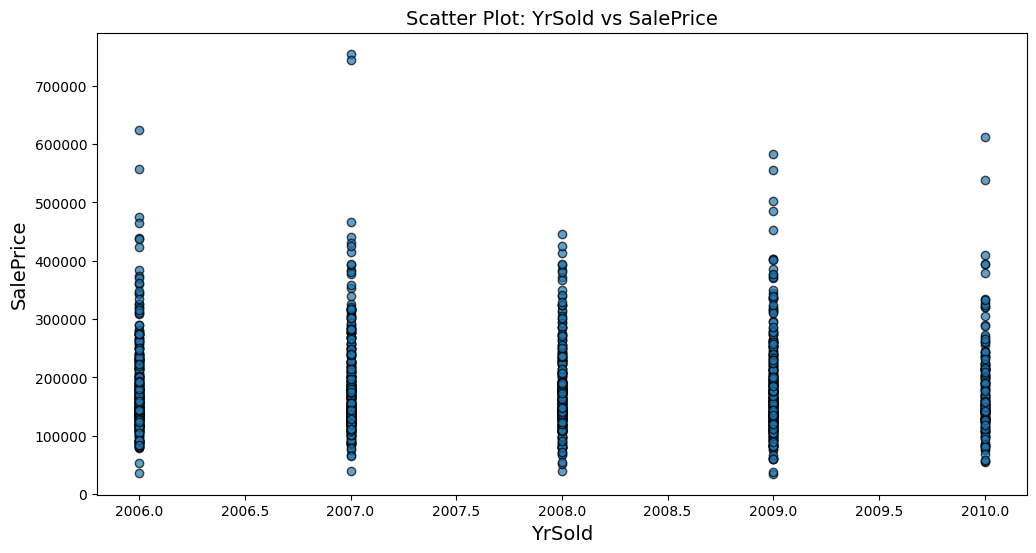

In [16]:
# Set default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# List of numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Plot scatter plots for numerical features against SalePrice
for feature in numerical_features:
    if feature != 'SalePrice':  # Exclude the target column itself
        plt.figure(figsize=(12, 6))
        plt.scatter(train[feature], train['SalePrice'], alpha=0.7, edgecolor='k')
        plt.title(f'Scatter Plot: {feature} vs SalePrice')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [17]:
train['Age'] = train['YrSold'] - train['YearBuilt']

In [18]:
Id_to_remove = set()

In [19]:
outliers_age_1 = train.query('Age> 95 and SalePrice > 200000')
outliers_age_2 = train.query('SalePrice > 650000')
outliers_age = pd.concat([outliers_age_1, outliers_age_2], axis =1)
Id_to_remove.update(outliers_age['Id'])

In [20]:
train['BedroomsRatio'] = train['BedroomAbvGr']/train['TotRmsAbvGrd']
train['YrBltAndRemod'] = train['YearBuilt'] + train['YearRemodAdd']
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['Total_sqr_footage'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] +
                              train['1stFlrSF'] + train['2ndFlrSF'])
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                            train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                           train['EnclosedPorch'] + train['ScreenPorch'] +
                           train['WoodDeckSF'])

In [21]:
Q1 = train['YrBltAndRemod'].quantile(0.25)
Q3 = train['YrBltAndRemod'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_yrbltandremod = train.query('YrBltAndRemod < @lower_bound or YrBltAndRemod > @upper_bound')
Id_to_remove.update(outliers_yrbltandremod['Id'])

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['TotalSF'].quantile(0.25)
Q3 = train['TotalSF'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_totalsf = train.query('TotalSF < @lower_bound or TotalSF > @upper_bound')
Id_to_remove.update(outliers_totalsf['Id'])


In [23]:



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Total_sqr_footage'].quantile(0.25)
Q3 = train['Total_sqr_footage'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_totalsqrfootage = train.query('Total_sqr_footage < @lower_bound or Total_sqr_footage > @upper_bound')

Id_to_remove.update(outliers_totalsqrfootage['Id'])



In [24]:

# Assuming 'train' DataFrame is already defined and contains the necessary columns
# Create the Total_Bathrooms feature
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                            train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Total_Bathrooms'].quantile(0.25)
Q3 = train['Total_Bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_totalbathrooms = train.query('Total_Bathrooms < @lower_bound or Total_Bathrooms > @upper_bound')

Id_to_remove.update(outliers_totalbathrooms['Id'])


In [25]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Total_porch_sf'].quantile(0.25)
Q3 = train['Total_porch_sf'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_totalporchsf = train.query('Total_porch_sf < @lower_bound or Total_porch_sf > @upper_bound')


# Assuming 'Id_to_remove' is a set that you want to update
Id_to_remove = set()
Id_to_remove.update(outliers_totalporchsf['Id'])



In [26]:
outliers_overallQual = train.query('OverallQual > 9.5 and SalePrice < 200000')
Id_to_remove.update(outliers_overallQual['Id'])

In [27]:
outliers_overallQual = train.query('OverallQual > 9.5 and SalePrice < 200000')
Id_to_remove.update(outliers_overallQual['Id'])

In [28]:
outliers_lotArea = train.query('LotArea> 100000')
Id_to_remove.update(outliers_lotArea['Id'])

In [29]:
outliers_GarageYrBlt = train.query('GarageYrBlt < 1990 and SalePrice > 500000')
Id_to_remove.update(outliers_GarageYrBlt['Id'])

In [30]:
outliers_GarageCars = train.query('GarageCars > 2.5 and SalePrice > 600000')
Id_to_remove.update(outliers_GarageCars['Id'])

In [31]:
outliers_TotRmsAbvGrd = train.query('TotRmsAbvGrd == 10 and SalePrice > 610000')
Id_to_remove.update(outliers_TotRmsAbvGrd['Id'])

In [32]:
outliers_bedroomsratio_1 = train.query('SalePrice > 650000')
outliers_bedroomsratio_2 = train.query('BedroomsRatio > 0.9')
outliers_bedroomsratio = pd.concat([outliers_bedroomsratio_1, outliers_bedroomsratio_2], axis =1)
Id_to_remove.update(outliers_bedroomsratio['Id'])

In [33]:
for dataset in combine:
    dataset['BedroomsRatio'] = dataset['BedroomAbvGr'] / dataset['TotRmsAbvGrd']
    dataset['YrBltAndRemod'] = dataset['YearBuilt'] + dataset['YearRemodAdd']
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    dataset['Total_sqr_footage'] = (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] +
                                    dataset['1stFlrSF'] + dataset['2ndFlrSF'])
    dataset['Total_Bathrooms'] = (dataset['FullBath'] + (0.5 * dataset['HalfBath']) +
                                  dataset['BsmtFullBath'] + (0.5 * dataset['BsmtHalfBath']))
    dataset['Total_porch_sf'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] +
                                 dataset['EnclosedPorch'] + dataset['ScreenPorch'] +
                                 dataset['WoodDeckSF'])

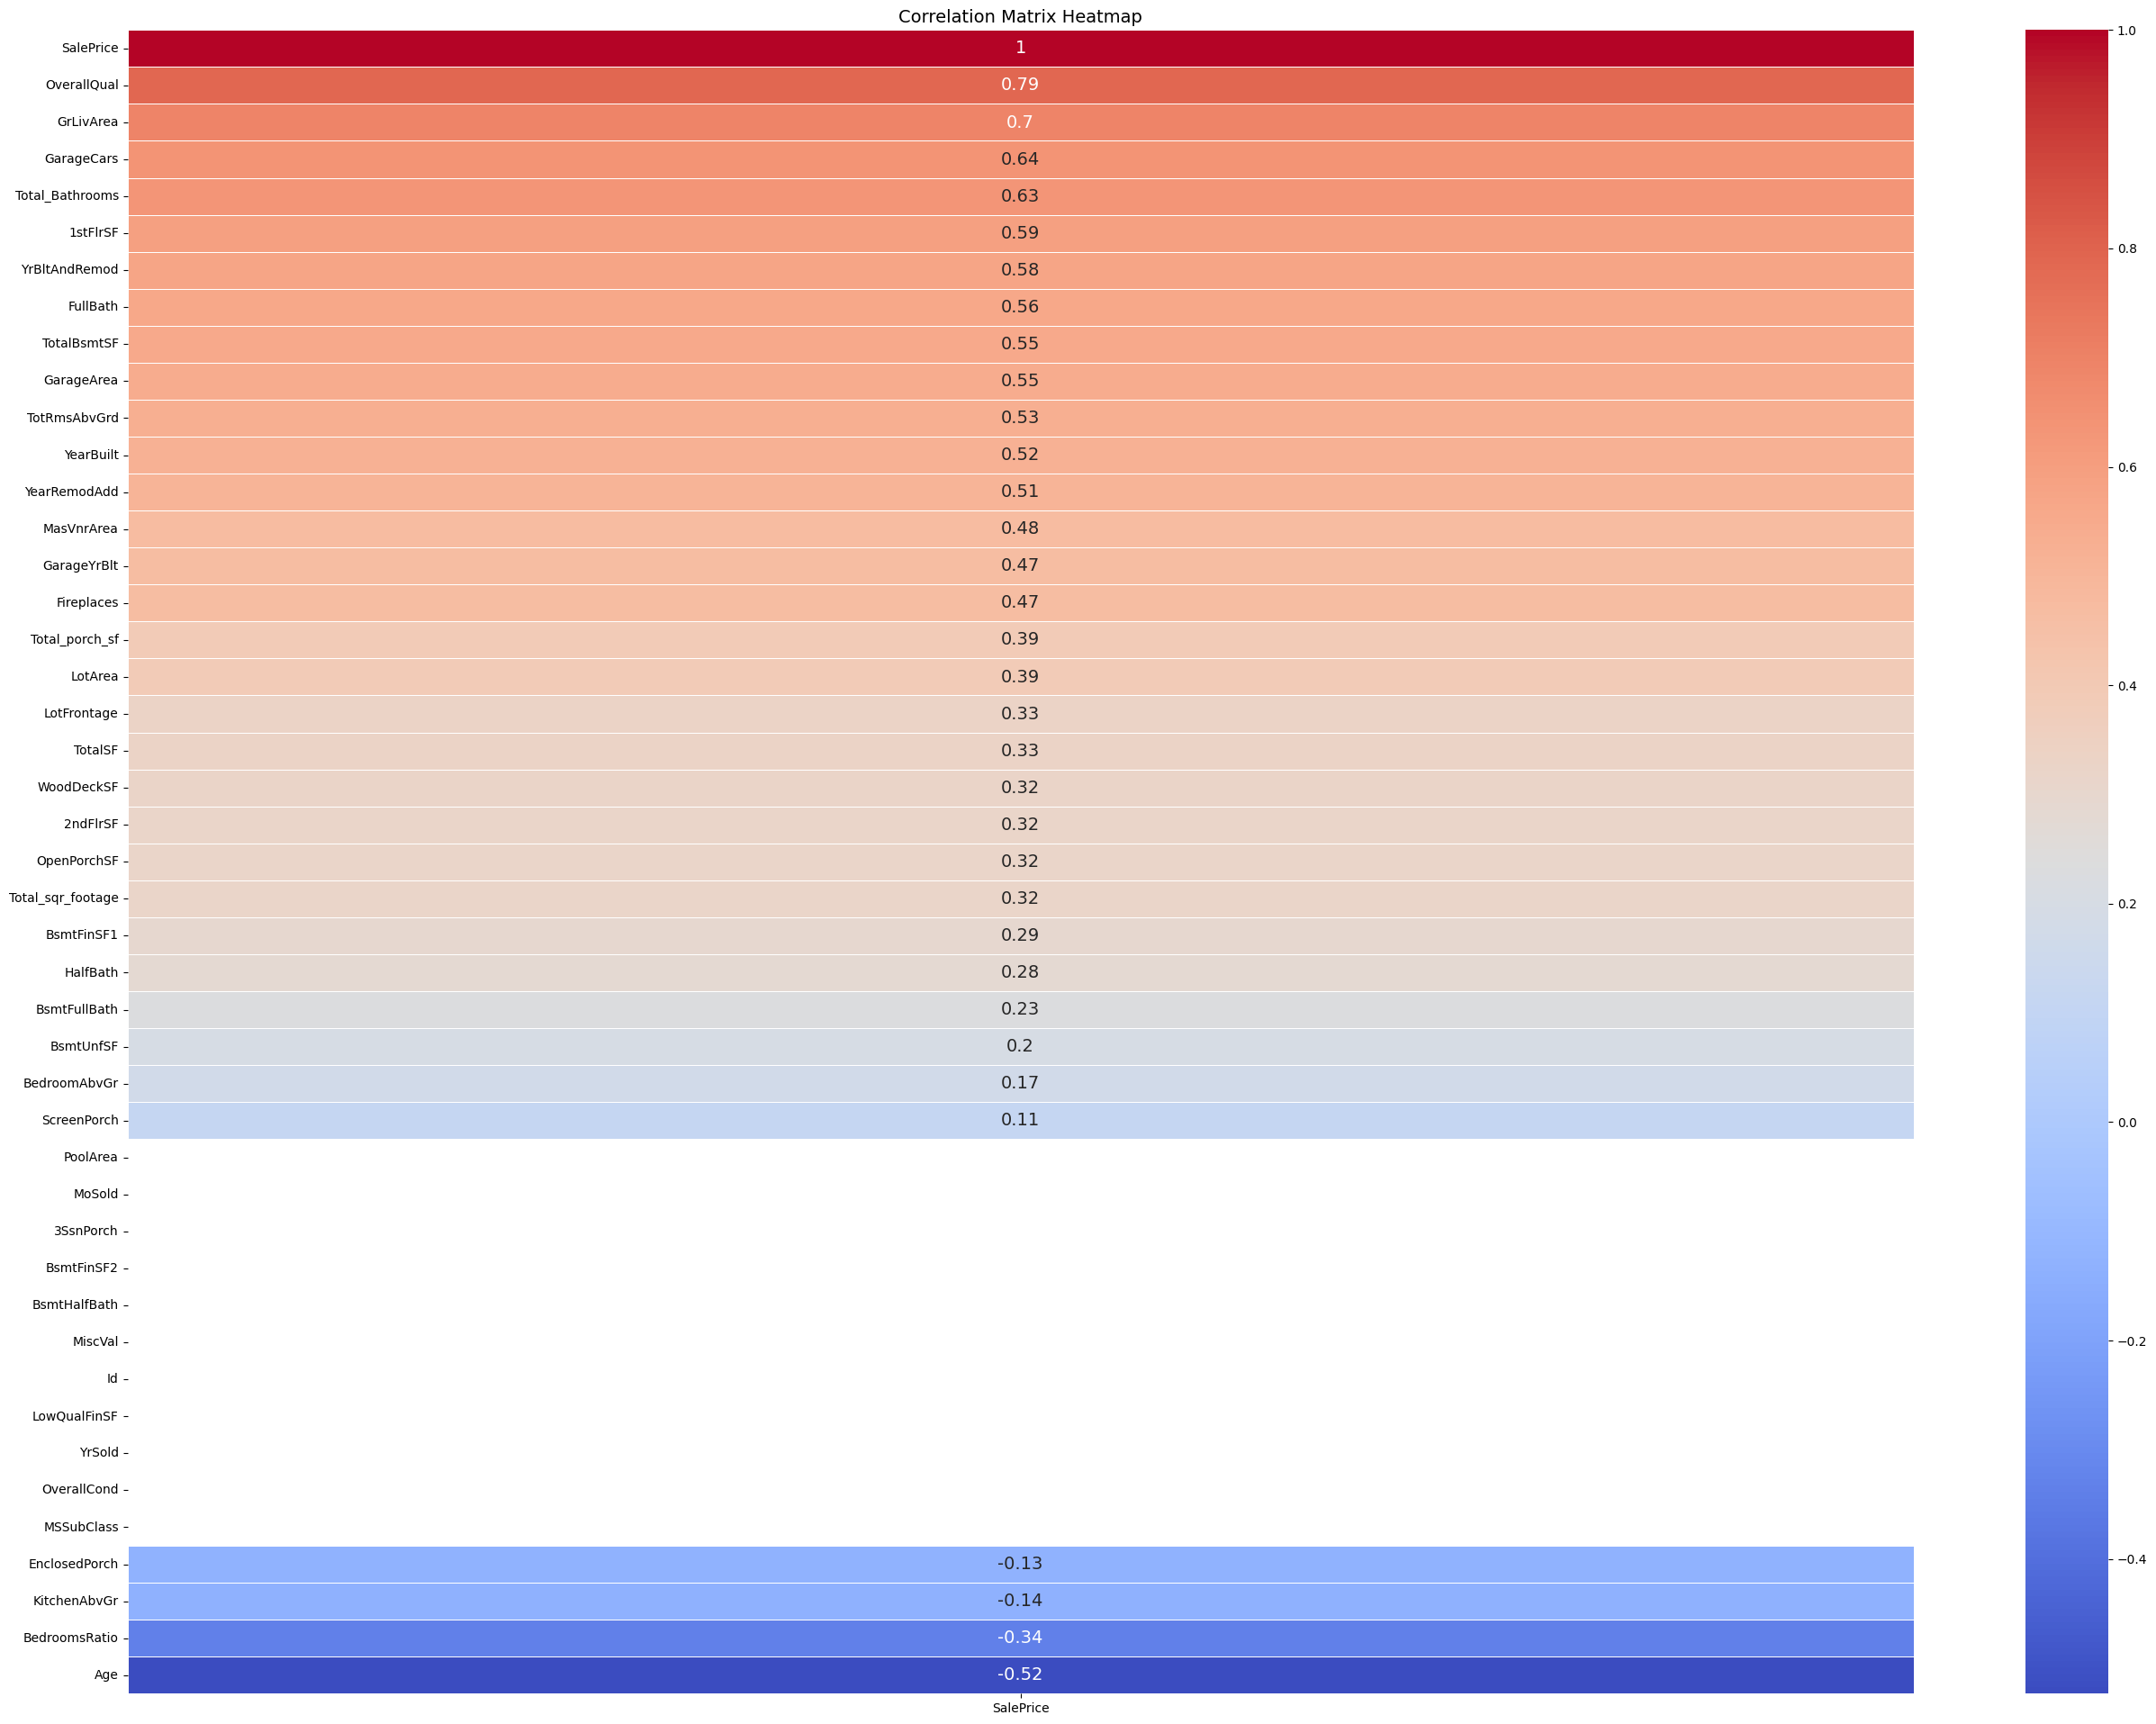

In [34]:

target_feature = 'SalePrice'
train_numeric = train[train.select_dtypes(include=np.number).columns]
corr_with_target = train_numeric.corr()[[target_feature]].sort_values(by=target_feature, ascending=False)
filtered_corr = corr_with_target[(corr_with_target > 0.1) | (corr_with_target < -0.1)]

plt.figure(figsize=(32, 24))
sb.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

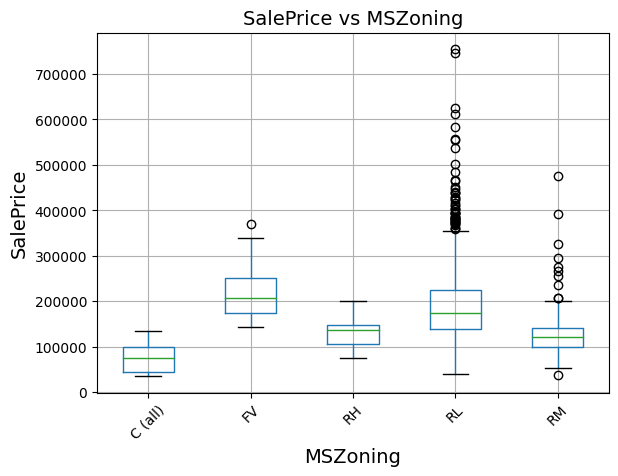

<Figure size 1000x600 with 0 Axes>

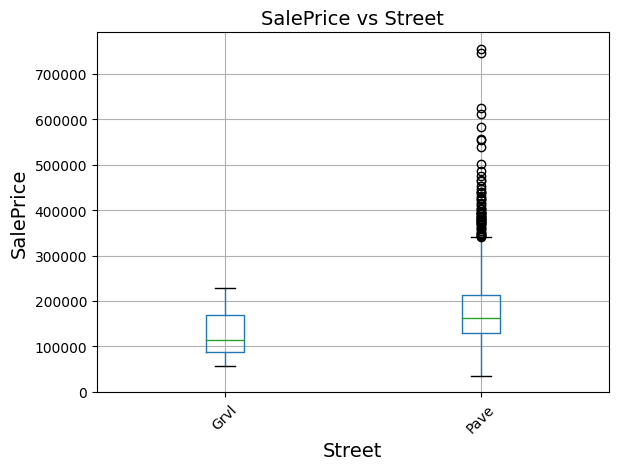

<Figure size 1000x600 with 0 Axes>

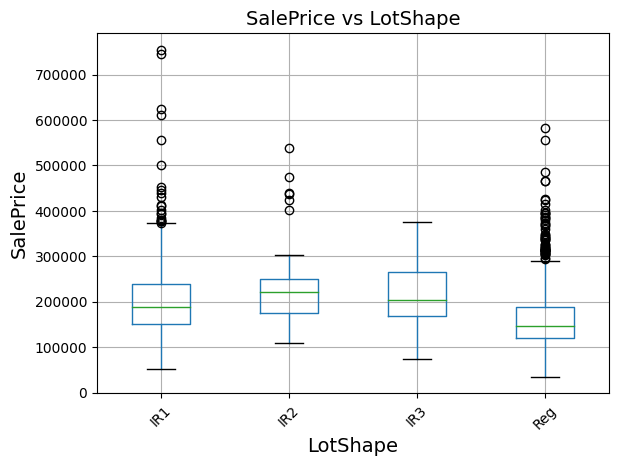

<Figure size 1000x600 with 0 Axes>

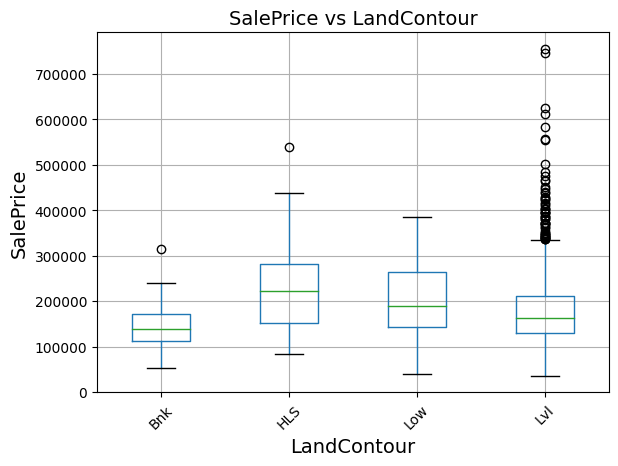

<Figure size 1000x600 with 0 Axes>

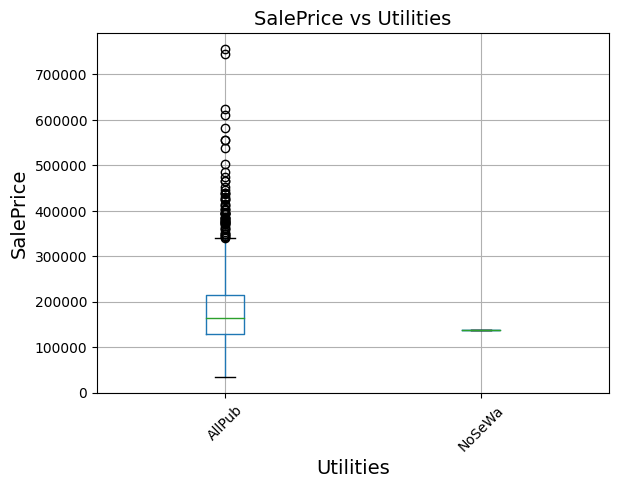

<Figure size 1000x600 with 0 Axes>

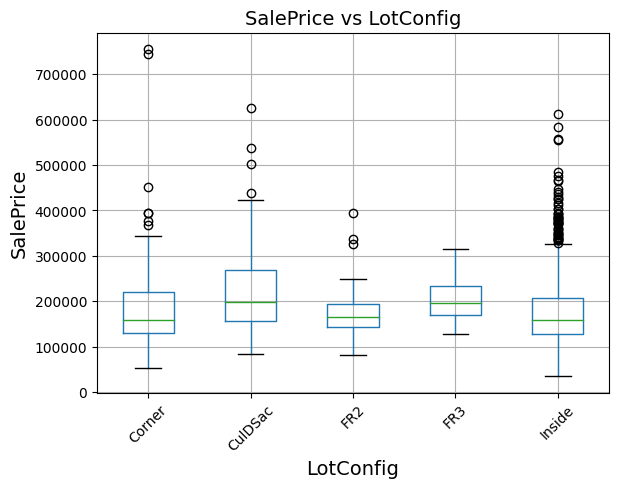

<Figure size 1000x600 with 0 Axes>

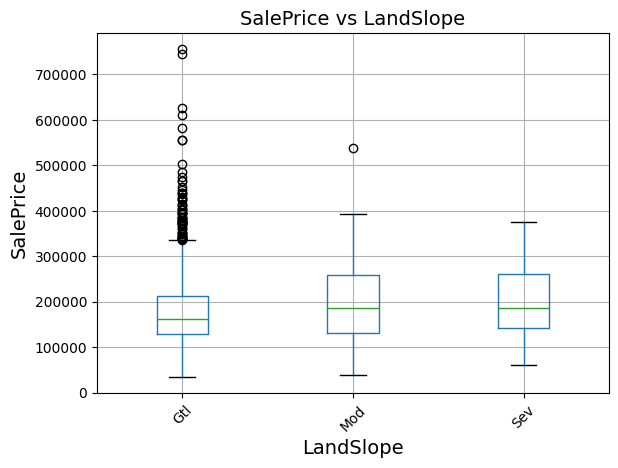

<Figure size 1000x600 with 0 Axes>

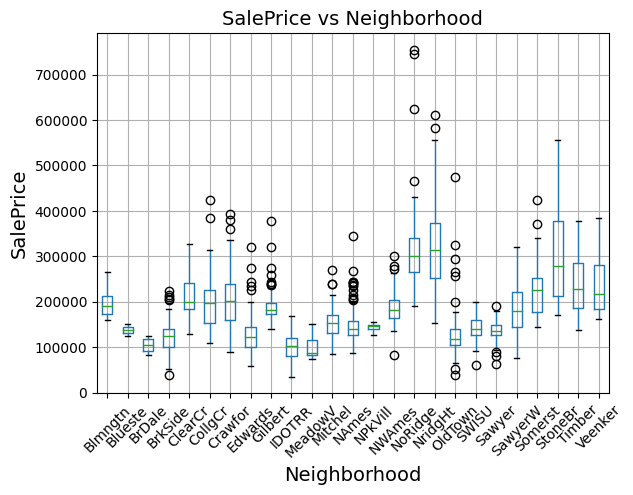

<Figure size 1000x600 with 0 Axes>

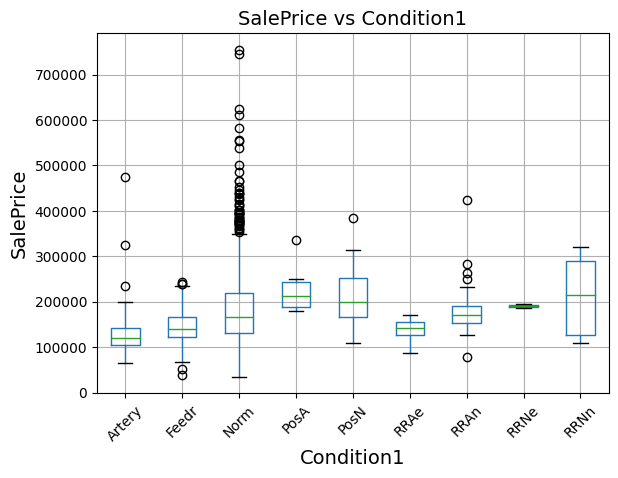

<Figure size 1000x600 with 0 Axes>

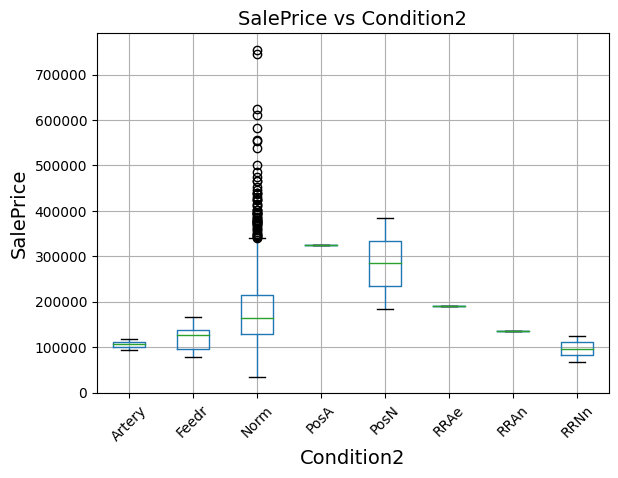

<Figure size 1000x600 with 0 Axes>

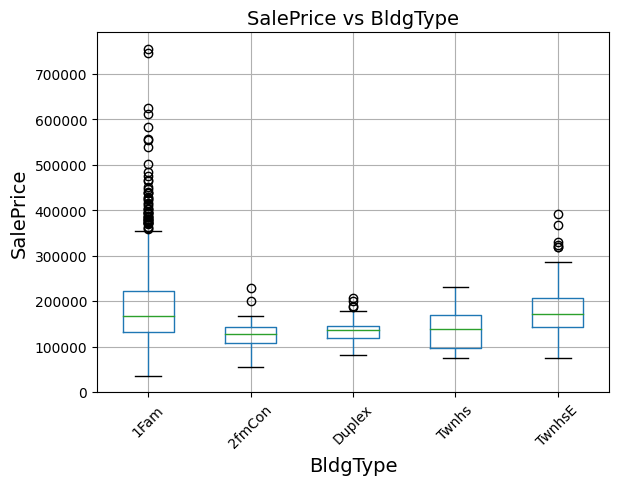

<Figure size 1000x600 with 0 Axes>

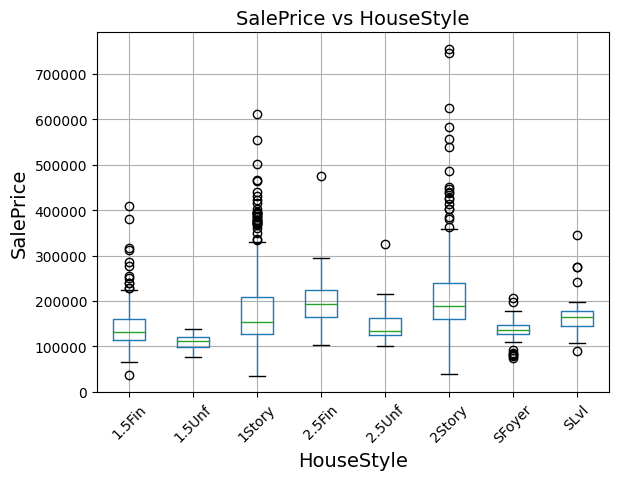

<Figure size 1000x600 with 0 Axes>

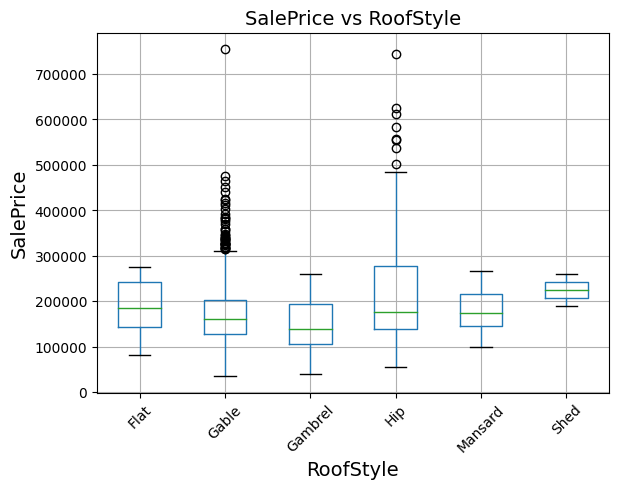

<Figure size 1000x600 with 0 Axes>

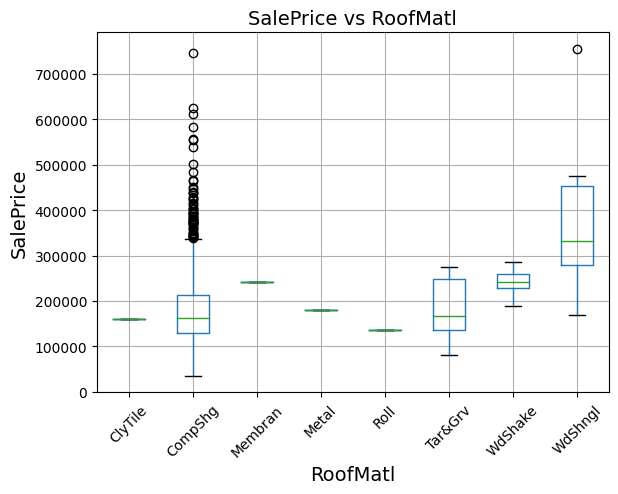

<Figure size 1000x600 with 0 Axes>

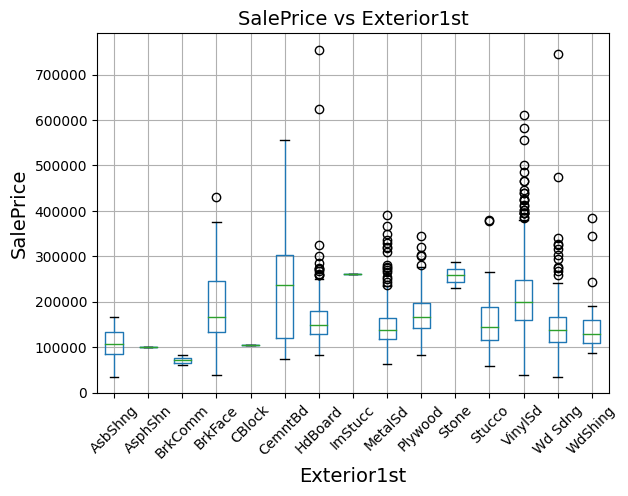

<Figure size 1000x600 with 0 Axes>

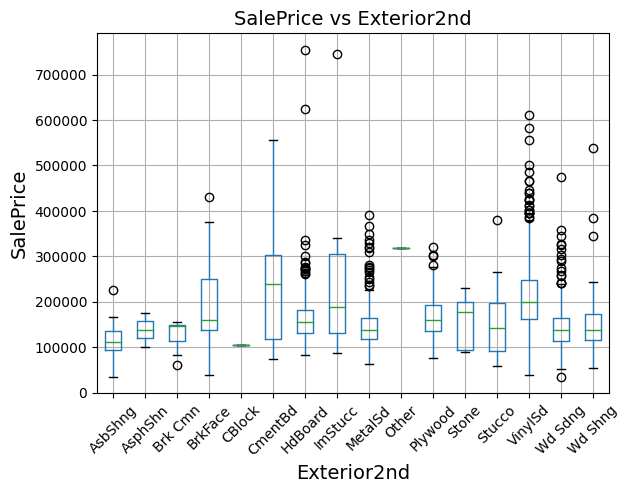

<Figure size 1000x600 with 0 Axes>

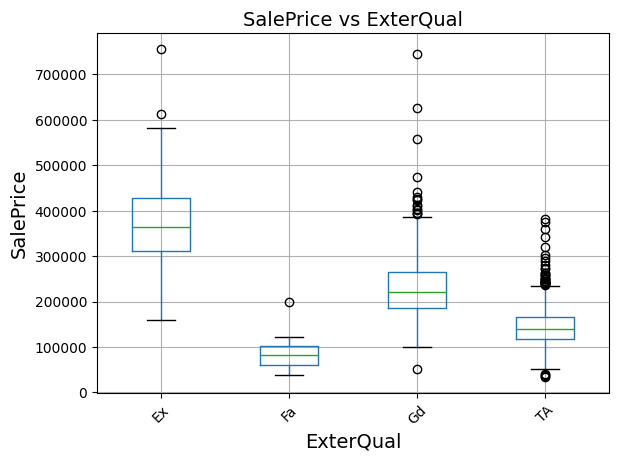

<Figure size 1000x600 with 0 Axes>

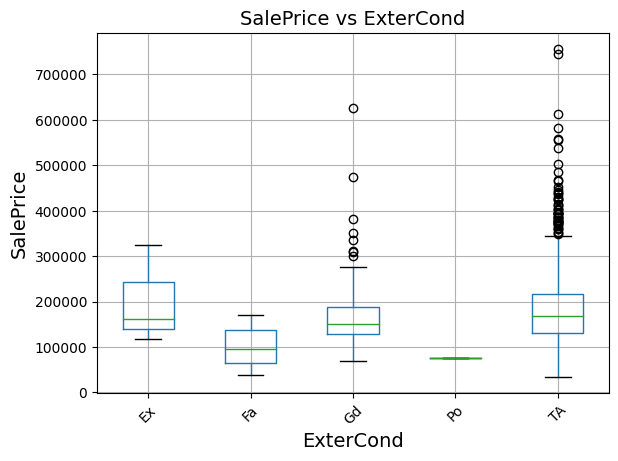

<Figure size 1000x600 with 0 Axes>

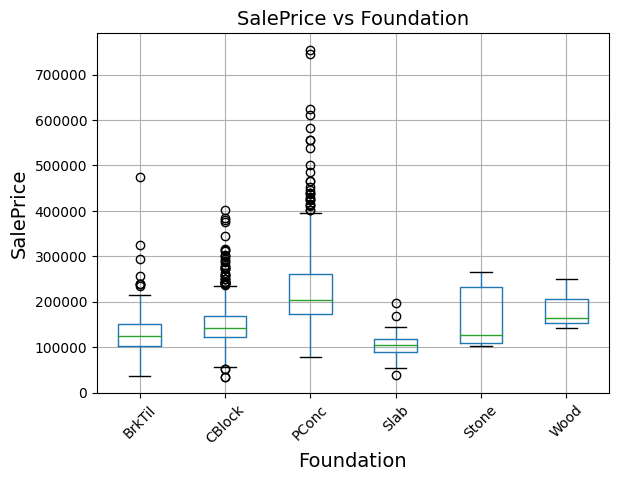

<Figure size 1000x600 with 0 Axes>

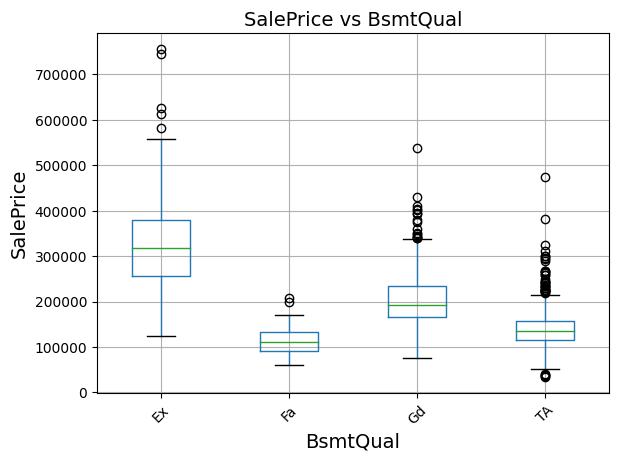

<Figure size 1000x600 with 0 Axes>

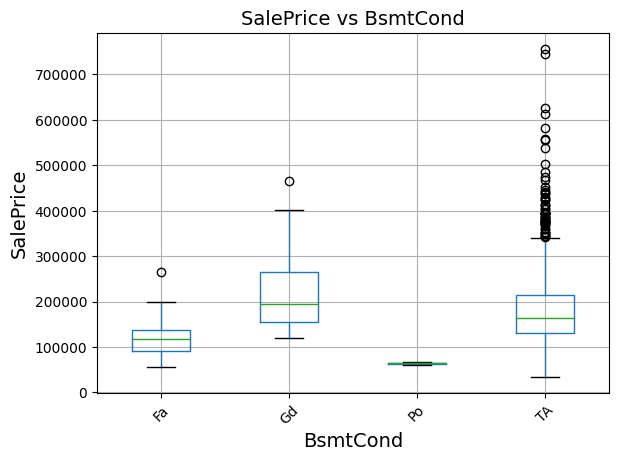

<Figure size 1000x600 with 0 Axes>

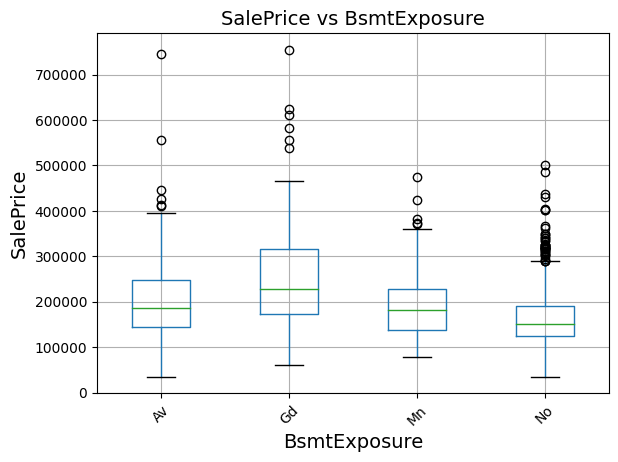

<Figure size 1000x600 with 0 Axes>

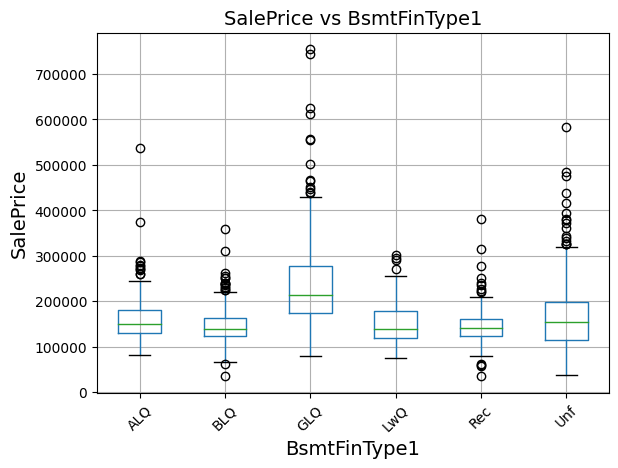

<Figure size 1000x600 with 0 Axes>

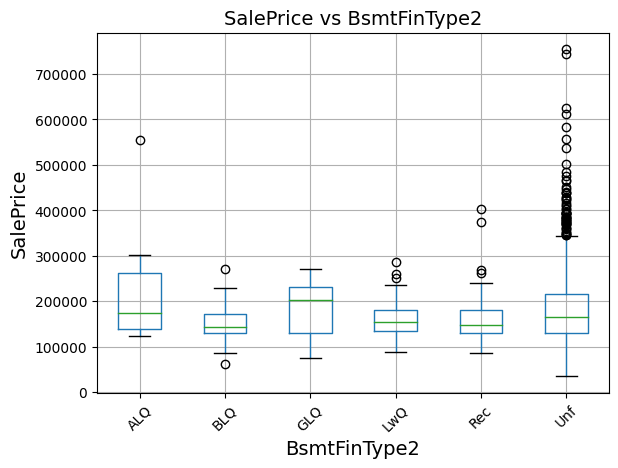

<Figure size 1000x600 with 0 Axes>

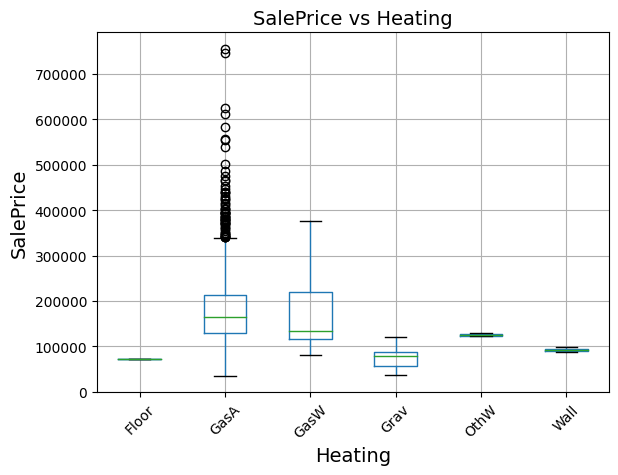

<Figure size 1000x600 with 0 Axes>

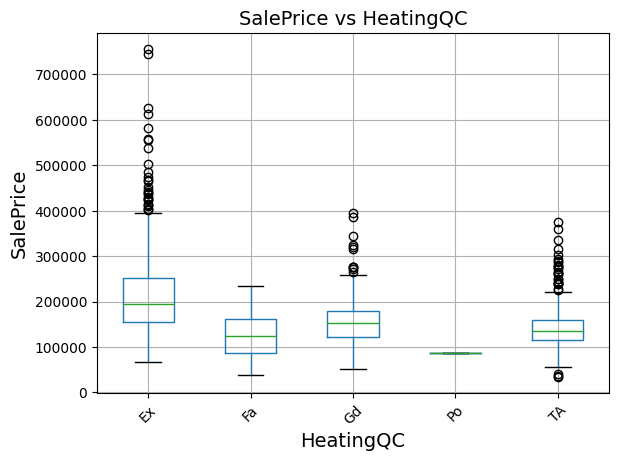

<Figure size 1000x600 with 0 Axes>

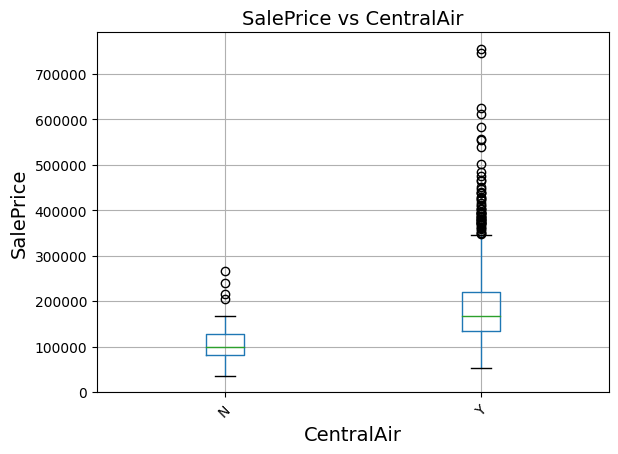

<Figure size 1000x600 with 0 Axes>

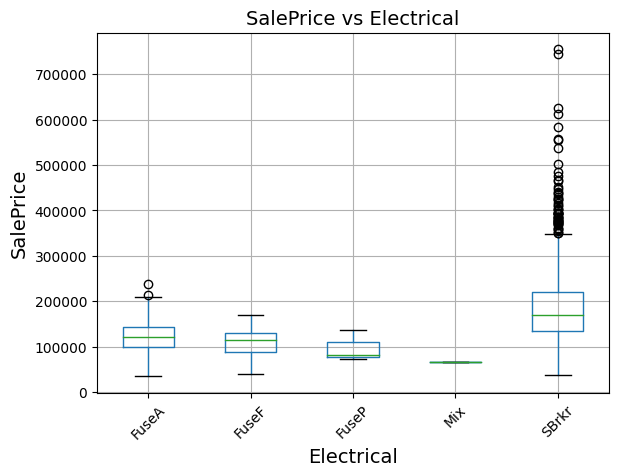

<Figure size 1000x600 with 0 Axes>

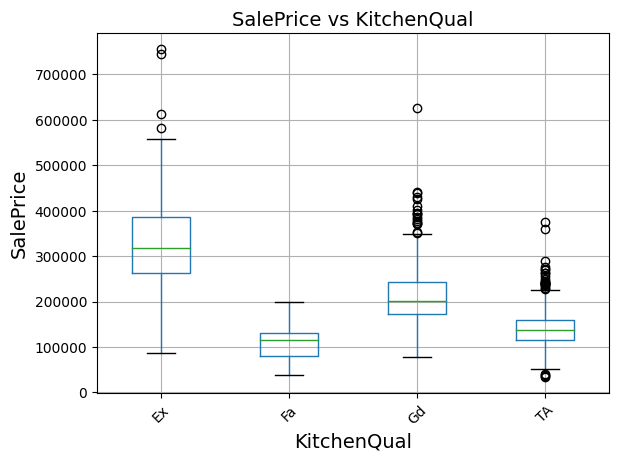

<Figure size 1000x600 with 0 Axes>

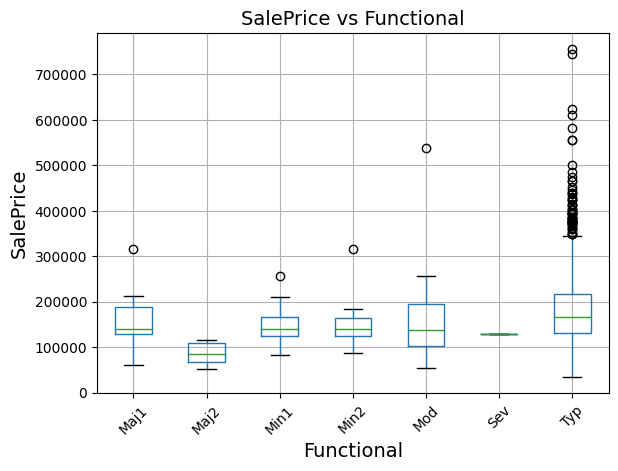

<Figure size 1000x600 with 0 Axes>

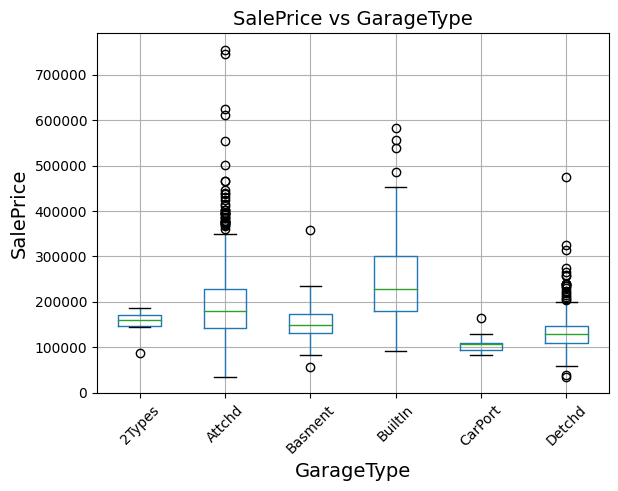

<Figure size 1000x600 with 0 Axes>

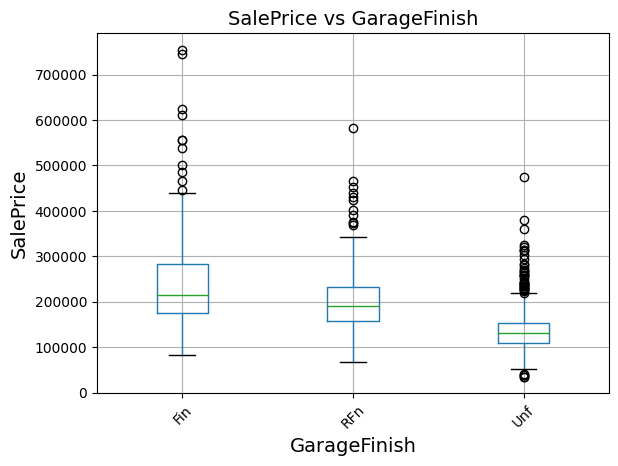

<Figure size 1000x600 with 0 Axes>

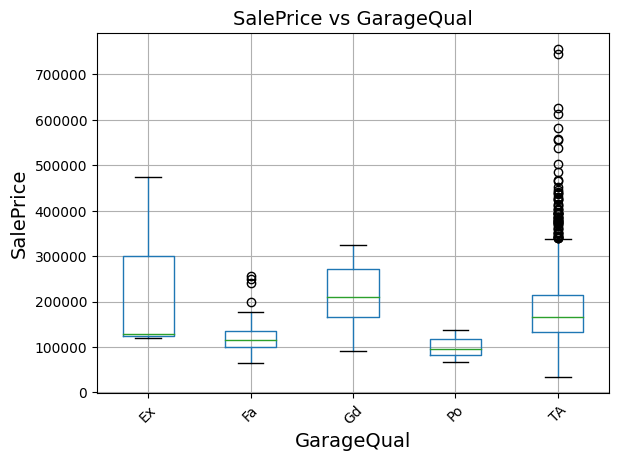

<Figure size 1000x600 with 0 Axes>

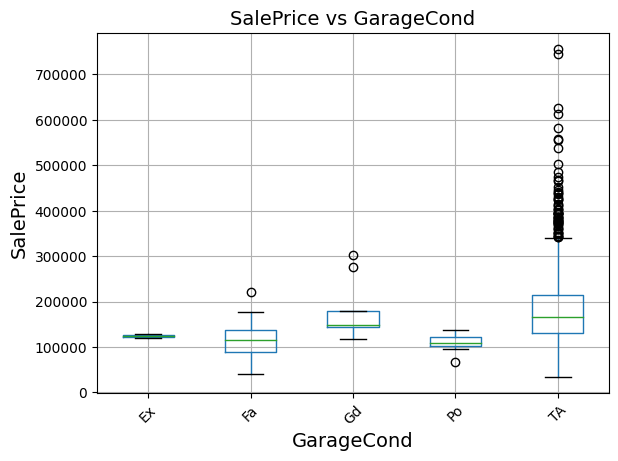

<Figure size 1000x600 with 0 Axes>

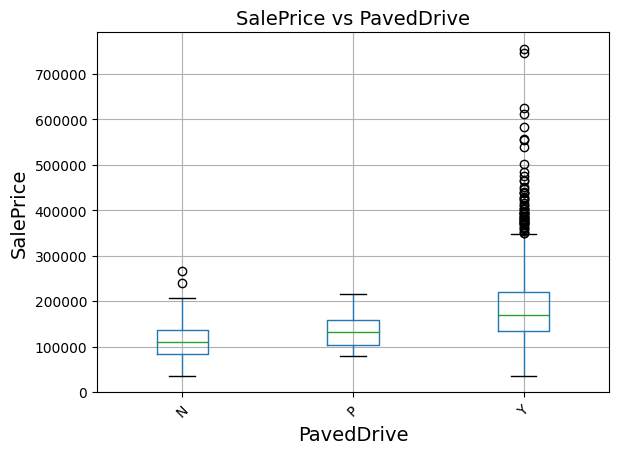

<Figure size 1000x600 with 0 Axes>

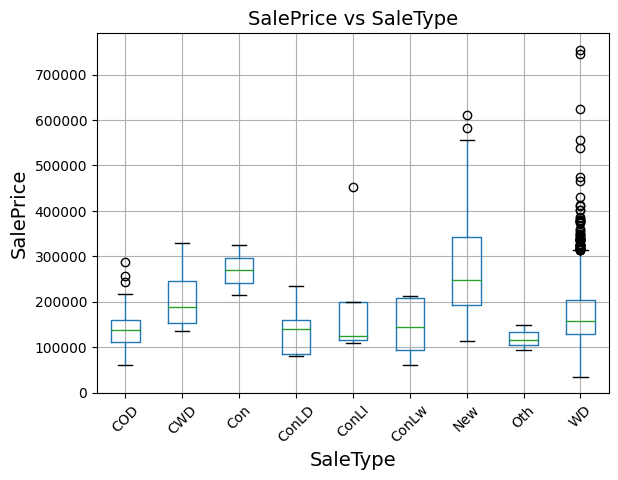

<Figure size 1000x600 with 0 Axes>

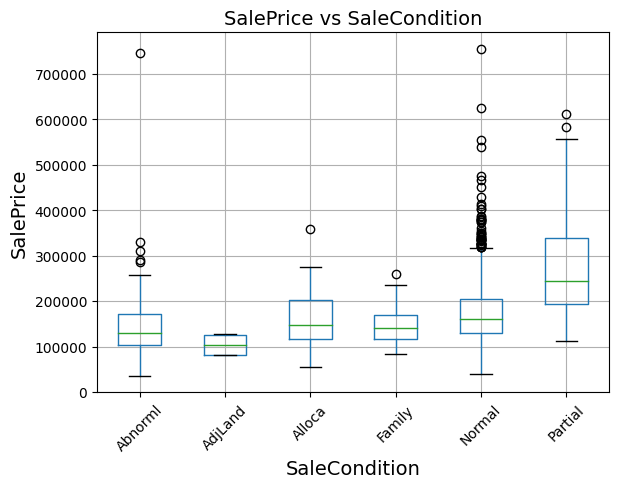

In [35]:
for col in object_columns:
    plt.figure(figsize=(10, 6))
    train.boxplot(column='SalePrice', by=col)
    plt.title(f'SalePrice vs {col}')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()



In [36]:
y_train = train['SalePrice']
train.drop(['SalePrice'], axis =1, inplace = True)

In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def label_encode_features(data, object_columns):
    """Label encode categorical features and add them as new columns with prefix 'le_'."""

    label_encoders = {}
    encoded_features = {}
    
    for column in object_columns:
        if column in data.columns:
            label_encoders[column] = LabelEncoder()
            encoded_col_name = f'le_{column}'
            encoded_features[encoded_col_name] = label_encoders[column].fit_transform(data[column].astype(str))
        else:
            print(f"Column '{column}' not found in DataFrame.")
    
    # Concatenate all new columns at once to avoid fragmentation
    encoded_df = pd.DataFrame(encoded_features)
    data = pd.concat([data, encoded_df], axis=1)
    
    return {
        'data': data,
        'encoded_features': list(encoded_features.keys()),
        'label_encoders': label_encoders
    }
if 'combine' in globals() and combine:
    combined_df = pd.concat(combine, ignore_index=True)
    
    # Identify object columns in the combined DataFrame
    object_columns = combined_df.select_dtypes(include='object').columns.tolist()
    
    # Run the label encoding function on the combined DataFrame
    le_result = label_encode_features(combined_df, object_columns)
    
    # Split the combined DataFrame back into train and test DataFrames
    train = le_result['data'].iloc[:len(combine[0]), :].copy()
    test = le_result['data'].iloc[len(combine[0]):, :].copy()
    
    # Apply the encoders to the original train and test DataFrames
    for column, encoder in le_result['label_encoders'].items():
        train[f'le_{column}'] = encoder.transform(combine[0][column].astype(str))
        test[f'le_{column}'] = encoder.transform(combine[1][column].astype(str))
    
    print("Train DataFrame:")
    train[le_result['encoded_features']].head(10)
    
    print("\nTest DataFrame:")
    test[le_result['encoded_features']].head(10)
else:
    print("The 'combine' variable is not defined or is empty.")


Train DataFrame:

Test DataFrame:


In [38]:
import pandas as pd

# Assuming 'train' is your DataFrame
# List of label-encoded columns
label_encoded_columns = [
    'le_MSZoning', 'le_Street', 'le_LotShape', 'le_LandContour', 'le_Utilities',
    'le_LotConfig', 'le_LandSlope', 'le_Neighborhood', 'le_Condition1', 'le_Condition2',
    'le_BldgType', 'le_HouseStyle', 'le_RoofStyle', 'le_RoofMatl', 'le_Exterior1st',
    'le_Exterior2nd', 'le_ExterQual', 'le_ExterCond', 'le_Foundation', 'le_BsmtQual',
    'le_BsmtCond', 'le_BsmtExposure', 'le_BsmtFinType1', 'le_BsmtFinType2', 'le_Heating',
    'le_HeatingQC', 'le_CentralAir', 'le_Electrical', 'le_KitchenQual', 'le_Functional',
    'le_GarageType', 'le_GarageFinish', 'le_GarageQual', 'le_GarageCond', 'le_PavedDrive',
    'le_SaleType', 'le_SaleCondition'
]

# Convert the specified columns to object type
train[label_encoded_columns] = train[label_encoded_columns].astype('object')

# Display the first few rows of the updated DataFrame
print(train.head())


    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  1.0        60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1  2.0        20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2  3.0        60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3  4.0        70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4  5.0        60.0       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond

In [39]:
y_train_df = y_train.to_frame(name='SalePrice')

# Concatenate y_train with train DataFrame
train = pd.concat([train, y_train_df], axis=1)


In [40]:
columns_to_be_dropped = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Functional', 'LandSlope', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleType','Street','LandContour','Utilities', 'LotConfig', 'HouseStyle', 'ExterQual','BsmtCond','HeatingQC', 'CentralAir','GarageFinish' ]
train.drop(columns=columns_to_be_dropped , axis =1, inplace=True)


In [41]:
test.drop(columns=columns_to_be_dropped , axis =1, inplace=True)

In [42]:
columns_to_drop = ['BsmtFinType1', 'BsmtFinType2', 'GarageQual', 'GarageType', 'GarageCond', 'ExterCond', 'Heating', 'Foundation', 'FullBath']
train.drop(columns=columns_to_drop , axis =1, inplace=True)


In [43]:
test.drop(columns=columns_to_drop , axis =1, inplace=True)

In [44]:
numeric_columns_drop = ['GarageArea', 'YearRemodAdd', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'KitchenAbvGr', 'EnclosedPorch']
train.drop(columns=numeric_columns_drop, axis =1, inplace=True)

In [45]:
test.drop(columns=numeric_columns_drop, axis =1, inplace=True)

In [46]:
id_list = list(Id_to_remove)
train = train[~train['Id'].isin(id_list)]

In [47]:
numeric_columns_drop = ['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass']
train.drop(columns= numeric_columns_drop, axis =1, inplace=True)
test.drop(columns= numeric_columns_drop, axis =1, inplace=True)

In [48]:
numeric_columns = list(train.select_dtypes(include=np.number).columns)

In [49]:
train.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1418 non-null   float64
 1   LotFrontage        1418 non-null   float64
 2   LotArea            1418 non-null   float64
 3   OverallQual        1418 non-null   float64
 4   YearBuilt          1418 non-null   float64
 5   MasVnrArea         1418 non-null   float64
 6   BsmtFinSF1         1418 non-null   float64
 7   TotalBsmtSF        1418 non-null   float64
 8   1stFlrSF           1418 non-null   float64
 9   2ndFlrSF           1418 non-null   float64
 10  GrLivArea          1418 non-null   float64
 11  TotRmsAbvGrd       1418 non-null   float64
 12  Fireplaces         1418 non-null   float64
 13  GarageYrBlt        1418 non-null   float64
 14  GarageCars         1418 non-null   float64
 15  WoodDeckSF         1418 non-null   float64
 16  OpenPorchSF        1418 non-n

In [50]:
train.select_dtypes(exclude=np.number)

MSZoning LotShape BldgType BsmtQual BsmtExposure Electrical KitchenQual  \
0          RL      Reg     1Fam       Gd           No      SBrkr          Gd   
1          RL      Reg     1Fam       Gd           Gd      SBrkr          TA   
2          RL      IR1     1Fam       Gd           Mn      SBrkr          Gd   
3          RL      IR1     1Fam       TA           No      SBrkr          Gd   
4          RL      IR1     1Fam       Gd           Av      SBrkr          Gd   
...       ...      ...      ...      ...          ...        ...         ...   
1454       FV      Reg     1Fam       Gd           No      SBrkr          Gd   
1455       RL      Reg     1Fam       Gd           No      SBrkr          TA   
1456       RL      Reg     1Fam       Gd           No      SBrkr          TA   
1457       RL      Reg     1Fam       TA           No      SBrkr          Gd   
1458       RL      Reg     1Fam       TA           Mn      FuseA          Gd   

     PavedDrive SaleCondition le_MSZoning le_Street le_LotShape  \
0             Y        Normal           3         1           3   
1             Y        Normal           3         1           3   
2             Y        Normal           3         1           0   
3             Y       Abnorml           3         1           0   
4             Y        Normal           3         1           0   
...         ...           ...         ...       ...         ...   
1454          Y        Normal           1         1           3   
1455          Y        Normal           3         1           3   
1456          Y        Normal           3         1           3   
1457          Y        Normal           3         1           3   
1458          Y        Normal           3         1           3   

     le_LandContour le_Utilities le_LotConfig le_LandSlope le_Neighborhood  \
0                 3            0            4            0               5   
1                 3            0            2            0              24   
2                 3            0            4            0               5   
3                 3            0            0            0               6   
4                 3            0            2            0              15   
...             ...          ...          ...          ...             ...   
1454              3            0            4            0              21   
1455              3            0            4            0               8   
1456              3            0            4            0              14   
1457              3            0            4            0               6   
1458              3            0            4            0              12   

     le_Condition1 le_Condition2 le_BldgType le_HouseStyle le_RoofStyle  \
0                2             2           0             5            1   
1                1             2           0             2            1   
2                2             2           0             5            1   
3                2             2           0             5            1   
4                2             2           0             5            1   
...            ...           ...         ...           ...          ...   
1454             2             2           0             2            1   
1455             2             2           0             5            1   
1456             2             2           0             2            1   
1457             2             2           0             5            1   
1458             2             2           0             2            3   

     le_RoofMatl le_Exterior1st le_Exterior2nd le_ExterQual le_ExterCond  \
0              1             12             13            2            4   
1              1              8              8            3            4   
2              1             12             13            2            4   
3              1             13             15            3            4   
4              1     

In [51]:
numeric_columns.remove('Id')

In [52]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'train' is your DataFrame and 'numeric_columns' is the list of numeric columns
# Exclude 'SalePrice' from the numeric columns if it's included
numeric_columns = [col for col in numeric_columns if col != 'SalePrice']

# Initialize the scaler
scaler = StandardScaler()

# Select only the numeric columns for scaling
train_numeric = train[numeric_columns]

# Fit and transform the numeric features
scaled_features = scaler.fit_transform(train_numeric)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=train_numeric.columns)

# Ensure the data types match the original DataFrame
scaled_df = scaled_df.astype(train[scaled_df.columns].dtypes.to_dict())

# Update the original DataFrame with the scaled features
train.update(scaled_df)

# Display the first few rows of the updated DataFrame
print(train.head())


    Id MSZoning  LotFrontage   LotArea LotShape BldgType  OverallQual  \
0  1.0       RL    -0.217160 -0.194799      Reg     1Fam     0.699649   
1  2.0       RL     0.499697 -0.064990      Reg     1Fam    -0.044614   
2  3.0       RL    -0.073788  0.121257      IR1     1Fam     0.699649   
3  4.0       RL    -0.456112 -0.070634      IR1     1Fam     0.699649   
4  5.0       RL     0.690859  0.461017      IR1     1Fam     1.443911   

   YearBuilt  MasVnrArea BsmtQual BsmtExposure  BsmtFinSF1  TotalBsmtSF  \
0   1.058370    0.572027       Gd           No    0.656974    -0.459791   
1   0.160443   -0.580098       Gd           Gd    1.302842     0.552103   
2   0.991857    0.372169       Gd           Mn    0.134580    -0.300281   
3  -1.868207   -0.580098       TA           No   -0.506539    -0.709026   
4   0.958600    1.477269       Gd           Av    0.535874     0.260498   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea KitchenQual  TotRmsAbvGrd  \
0      SBrkr -0.810335  1.223153   0.

In [53]:
for dataset in combine:
    dataset.drop('Id', axis=1, inplace=True)

In [54]:
scaled_features = scaler.transform(test[numeric_columns])
scaled_df = pd.DataFrame(scaled_features, columns=test[numeric_columns].columns)
scaled_df = scaled_df.astype(test[scaled_df.columns].dtypes.to_dict())
test.update(scaled_df)

In [55]:
from sklearn.model_selection import train_test_split
train_y = train['SalePrice']
train.drop('SalePrice', axis =1, inplace=True)
X_train, X_cv, Y_train, Y_cv = train_test_split(train, train_y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [57]:
columns_to_encode = ['PavedDrive', 'Electrical', 'BldgType', 'SaleCondition', 'BsmtExposure', 'LotShape', 'BsmtQual', 'MSZoning', 'KitchenQual', 'SaleCondition']
encoded_train_dfs = []
encoded_cv_dfs = []
encoded_test_dfs = []
for column in columns_to_encode:
    encoded_train_data = encoder.fit_transform(X_train[[column]])
    encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out([column]))
    encoded_train_dfs.append(encoded_train_df.reset_index(drop=True))

    encoded_cv_data = encoder.transform(X_cv[[column]])
    encoded_cv_df = pd.DataFrame(encoded_cv_data, columns=encoder.get_feature_names_out([column]))
    encoded_cv_dfs.append(encoded_cv_df.reset_index(drop=True))
    
    encoded_test_data = encoder.transform(test[[column]])
    encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out([column]))
    encoded_test_dfs.append(encoded_test_df.reset_index(drop=True))
    

X_train = pd.concat([X_train.reset_index(drop=True)] + encoded_train_dfs, axis=1).drop(columns_to_encode, axis=1)
X_cv = pd.concat([X_cv.reset_index(drop=True)] + encoded_cv_dfs, axis=1).drop(columns_to_encode, axis=1)
test = pd.concat([test.reset_index(drop=True)] + encoded_test_dfs, axis=1).drop(columns_to_encode, axis=1)


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, Y_train)
bayesian_clf = clf.predict(X_cv)

In [60]:
rmse = mean_squared_error(bayesian_clf, Y_cv, squared=False)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((bayesian_clf - Y_cv) / bayesian_clf)) * 100
print("Mean Absolute Percentage Error:", mape)

Root Mean Squared Error: 70304.27987820758
Mean Absolute Percentage Error: 29.24996540106975


In [61]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

best_rmse = float('inf')
best_params = {}

# Iterate over all combinations of parameters
for kernel in param_grid['kernel']:
    for C in param_grid['C']:
        for gamma in param_grid['gamma']:
            for epsilon in param_grid['epsilon']:
                # Define the pipeline
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svr', SVR(kernel=kernel, C=C, gamma=gamma, epsilon=epsilon))
                ])
                
                # Fit the model
                pipeline.fit(X_train_split, Y_train_split)
                
                # Predict on the validation set
                y_pred = pipeline.predict(X_val_split)
                
                # Calculate RMSE
                rmse = mean_squared_error(Y_val_split, y_pred, squared=False)
                
                # Update best parameters if current RMSE is lower
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {'kernel': kernel, 'C': C, 'gamma': gamma, 'epsilon': epsilon}

print("Best parameters found: ", best_params)
print("Best RMSE: ", best_rmse)

# Use the best parameters to fit the final model
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(**best_params))
])
best_pipeline.fit(X_train, Y_train)
y_pred = best_pipeline.predict(X_cv)

# Calculate RMSE and MAPE for the final model
rmse = mean_squared_error(Y_cv, y_pred, squared=False)
mape = np.mean(np.abs((Y_cv - y_pred) / y_pred)) * 100

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Percentage Error: ", mape)


Best parameters found:  {'kernel': 'linear', 'C': 100, 'gamma': 'scale', 'epsilon': 0.1}
Best RMSE:  40156.62910624345
Root Mean Squared Error:  41569.822127194675
Mean Absolute Percentage Error:  17.341637745406498


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the models
models = [
    ('LR', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBM', GradientBoostingRegressor())
]

# Evaluate each model
best_rmse = float('inf')
best_model_name = None

for name, regressor in models:
    try:
        rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, Y_train, cv=5, scoring="neg_mean_squared_error", error_score='raise')))
        print(f"RMSE: {round(rmse, 4)} ({name})")
        if rmse < best_rmse:
            best_rmse = rmse
            best_model_name = name
    except ValueError as e:
        print(f"Error evaluating {name}: {e}")

print(f"Best model: {best_model_name} with RMSE: {round(best_rmse, 4)}")

# Example of using the best model for prediction
if best_model_name:
    best_model = [model for model in models if model[0] == best_model_name][0][1]
    best_model.fit(X_train, Y_train)
    y_pred = best_model.predict(X_cv)

    # Calculate RMSE and MAPE for the best model
    rmse = mean_squared_error(Y_cv, y_pred, squared=False)
    mape = np.mean(np.abs((Y_cv - y_pred) / y_pred)) * 100

    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Percentage Error: ", mape)




RMSE: 69960.1381 (LR)
RMSE: 71705.9604 (KNN)
RMSE: 54674.4106 (CART)
RMSE: 37698.8036 (RF)
RMSE: 34588.9617 (GBM)
Best model: GBM with RMSE: 34588.9617
Root Mean Squared Error:  37342.435152562975
Mean Absolute Percentage Error:  14.477741444493402


In [63]:
test_pred = best_model.predict(test)

In [64]:

submission = test[['Id']].copy().astype('int')
submission['SalePrice'] = test_pred

In [65]:
submission.to_csv('submission_x', index=False)